<a href="https://colab.research.google.com/github/eranhermush/DeepLearningProject/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the data

In [ ]:
! pip install -q kaggle

In [ ]:
 from google.colab import files

In [ ]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys

Mounted at /content/drive


In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eranhermush","key":"9bdc82c1991449dc2925b5a4ae7a23a2"}'}

In [ ]:
! mkdir ~/.kaggle/
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           7675        235  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            618         29  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           1716         59  1.0              
evangower/premier-league-match-data                            Pr

In [ ]:
! kaggle competitions download -c birdclef-2022

100% 6.10G/6.12G [01:05<00:00, 120MB/s]
100% 6.12G/6.12G [01:06<00:00, 99.5MB/s]


In [ ]:
! mkdir train

In [ ]:
! unzip birdclef-2022.zip -d train

Streaming output truncated to the last 5000 lines.
  inflating: train/train_audio/normoc/XC608251.ogg  
  inflating: train/train_audio/normoc/XC608252.ogg  
  inflating: train/train_audio/normoc/XC608253.ogg  
  inflating: train/train_audio/normoc/XC608254.ogg  
  inflating: train/train_audio/normoc/XC608255.ogg  
  inflating: train/train_audio/normoc/XC608256.ogg  
  inflating: train/train_audio/normoc/XC608257.ogg  
  inflating: train/train_audio/normoc/XC608258.ogg  
  inflating: train/train_audio/normoc/XC608259.ogg  
  inflating: train/train_audio/normoc/XC608447.ogg  
  inflating: train/train_audio/normoc/XC608450.ogg  
  inflating: train/train_audio/normoc/XC608452.ogg  
  inflating: train/train_audio/normoc/XC608453.ogg  
  inflating: train/train_audio/normoc/XC608485.ogg  
  inflating: train/train_audio/normoc/XC608486.ogg  
  inflating: train/train_audio/normoc/XC608487.ogg  
  inflating: train/train_audio/normoc/XC608489.ogg  
  inflating: train/train_audio/normoc/XC608496.o

In [ ]:
!ls train/train_audio

afrsil1  bongul   chbsan   gamqua   houspa   madpet   osprey   ribgul	sora
akekee	 brant	  chemun   glwgul   hudgod   magpet1  pagplo   rinduc	spodov
akepa1	 brnboo   chukar   gnwtea   iiwi     mallar3  palila   rinphe	sposan
akiapo	 brnnod   cintea   golphe   incter1  masboo   parjae   rocpig	towsol
akikik	 brnowl   comgal1  grbher3  jabwar   mauala   pecsan   rorpar	wantat1
amewig	 brtcur   commyn   grefri   japqua   maupar   peflov   rudtur	warwhe1
aniani	 bubsan   compea   gresca   kalphe   merlin   perfal   ruff	wesmea
apapan	 buffle   comsan   gryfra   kauama   mitpar   pibgre   saffin	wessan
arcter	 bulpet   comwax   gwfgoo   laugul   moudov   pomjae   sander	wetshe
barpet	 burpar   coopet   hawama   layalb   norcar   puaioh   semplo	whfibi
bcnher	 buwtea   crehon   hawcoo   lcspet   norhar2  reccar   sheowl	whiter
belkin1  cacgoo1  dunlin   hawcre   leasan   normoc   redava   shtsan	whttro
bkbplo	 calqua   elepai   hawgoo   leater1  norpin   redjun   skylar	wiltur
bknsti	 cango

In [ ]:
!cat train/test.csv

row_id,file_id,bird,end_time
soundscape_1000170626_akiapo_5,soundscape_1000170626,akiapo,5
soundscape_1000170626_akiapo_10,soundscape_1000170626,akiapo,10
soundscape_1000170626_akiapo_15,soundscape_1000170626,akiapo,15


# Prepare the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from pathlib import Path
import torch.nn as nn

import librosa
import librosa.display
import IPython.display as ipd

In [ ]:
sns.set()
BASE_DIR = Path('train')
train = pd.read_csv(BASE_DIR/'train_metadata.csv')
ebird = pd.read_csv(BASE_DIR/'eBird_Taxonomy_v2021.csv')
train_dir = BASE_DIR / "train_audio"
scored_birds = BASE_DIR / "scored_birds.json"

# train.head()

In [ ]:
train.isna().sum()

primary_label       0
secondary_labels    0
type                0
latitude            0
longitude           0
scientific_name     0
common_name         0
author              0
license             0
rating              0
time                0
url                 0
filename            0
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train1['common_name'].value_counts()[-25:]

Golden Pheasant            11
Hawaii Akepa               10
Canvasback                 10
Hawaiian Goose              9
Hudsonian Godwit            8
Inca Tern                   8
Pomarine Jaeger             7
Bulwer's Petrel             7
Lesser Scaup                7
Palila                      7
Erckel's Francolin          6
South Polar Skua            6
Akekee                      6
Buff-breasted Sandpiper     5
Black-winged Petrel         3
Cook's Petrel               3
Sharp-tailed Sandpiper      3
Maui Alauahio               3
Hawaiian Petrel             3
Hawaiian Hawk               3
Puaiohi                     3
Laysan Albatross            3
Akikiki                     2
Akohekohe                   2
Maui Parrotbill             1
Name: common_name, dtype: int64

Add coloumns of the length of secondary label and the length of the type

In [ ]:
def list_to_new_coloumns(str_list, max_labels=6):
    if str_list != '[]':
        seperated_list = str_list.split(',')
        seperated_list[0] = seperated_list[0][1:] # remove the '['
        seperated_list[-1] = seperated_list[-1][:-1] # remove the ']'
        seperated_list.extend([None] * (max_labels - len(seperated_list))) # we wwant max_labels coloumns
        return seperated_list
    else:
        return [None] * max_labels


train['secondary_label_len'] = train['secondary_labels'].apply(lambda x: len(x.split(',')))
train['type_len'] = train['type'].apply(lambda x: len(x.split(',')))
max_labels = train['secondary_label_len'].max()
max_types = train['type_len'].max()

values_secondary_labels = train['secondary_labels'].apply(lambda x: list_to_new_coloumns(x, max_labels))
df_secondary_labels = pd.DataFrame(values_secondary_labels.to_list(), columns=[f'l{i+2}' for i in range(max_labels)])
print(df_secondary_labels.head())

values_type = train['type'].apply(lambda x: list_to_new_coloumns(x, max_types))
df_type = pd.DataFrame(values_type.to_list(), columns=[f't{i+1}' for i in range(max_types)])
print(df_type.head())
train['secondary_label_len'] = np.where(df_secondary_labels['l2'].values != None, train['secondary_label_len'], 0)
train['type_len'] = np.where(df_type['t1'].values != None, train['type_len'], 0)

train.head()

         l2         l3         l4    l5    l6    l7
0      None       None       None  None  None  None
1  'houspa'   'redava'   'zebdov'  None  None  None
2      None       None       None  None  None  None
3      None       None       None  None  None  None
4      None       None       None  None  None  None
              t1              t2    t3    t4    t5    t6    t7    t8    t9
0         'call'   'flight call'  None  None  None  None  None  None  None
1         'call'            None  None  None  None  None  None  None  None
2         'call'          'song'  None  None  None  None  None  None  None
3   'alarm call'          'call'  None  None  None  None  None  None  None
4  'flight call'            None  None  None  None  None  None  None  None


primary_label                secondary_labels                     type  \
0       afrsil1                              []  ['call', 'flight call']   
1       afrsil1  ['houspa', 'redava', 'zebdov']                 ['call']   
2       afrsil1                              []         ['call', 'song']   
3       afrsil1                              []   ['alarm call', 'call']   
4       afrsil1                              []          ['flight call']   

   latitude  longitude  scientific_name         common_name          author  \
0   12.3910    -1.4930  Euodice cantans  African Silverbill       Bram Piot   
1   19.8801  -155.7254  Euodice cantans  African Silverbill        Dan Lane   
2   16.2901   -16.0321  Euodice cantans  African Silverbill       Bram Piot   
3   17.0922    54.2958  Euodice cantans  African Silverbill  Oscar Campbell   
4   21.4581  -157.7252  Euodice cantans  African Silverbill   Ross Gallardy   

                                             license  rating   time  \
0  Creative Commons Attribution-NonCommercial-Sha...     2.5  08:00   
1  Creative Commons Attribution-NonCommercial-Sha...     3.5  08:30   
2  Creative Commons Attribution-NonCommercial-Sha...     4.0  11:30   
3  Creative Commons Attribution-NonCommercial-Sha...     4.0  11:00   
4  Creative Commons Attribution-NonCommercial-Sha...     3.0  16:30   

                                 url              filename  \
0  https://www.xeno-canto.org/125458  afrsil1/XC125458.ogg   
1  https://www.xeno-canto.org/175522  afrsil1/XC175522.ogg   
2  https://www.xeno-canto.org/177993  afrsil1/XC177993.ogg   
3  https://www.xeno-canto.org/205893  afrsil1/XC205893.ogg   
4  https://www.xeno-canto.org/207431  afrsil1/XC207431.ogg   

   secondary_label_len  type_len  
0                    0         2  
1                    3         1  
2                    0         2  
3                    0         2  
4                    0         1

# Data visualizations

In [ ]:
train[train['rating']>3]

primary_label                secondary_labels  \
1           afrsil1  ['houspa', 'redava', 'zebdov']   
2           afrsil1                              []   
3           afrsil1                              []   
5           afrsil1                              []   
6           afrsil1                              []   
...             ...                             ...   
14844        zebdov                              []   
14845        zebdov                              []   
14846        zebdov                              []   
14848        zebdov                              []   
14849        zebdov                              []   

                                     type  latitude  longitude  \
1                                ['call']   19.8801  -155.7254   
2                        ['call', 'song']   16.2901   -16.0321   
3                  ['alarm call', 'call']   17.0922    54.2958   
5                         ['flight call']   21.4581  -157.7252   
6                                ['call']   21.3561  -158.0205   
...                                   ...       ...        ...   
14844                            ['song']   14.8920   105.8667   
14845                            ['song']   18.2935    99.5007   
14846                       ['uncertain']   13.9685   100.4153   
14848  ['adult', 'sex uncertain', 'song']    1.4168   103.7287   
14849  ['adult', 'call', 'sex uncertain']    1.4347   103.7043   

        scientific_name         common_name                    author  \
1       Euodice cantans  African Silverbill                  Dan Lane   
2       Euodice cantans  African Silverbill                 Bram Piot   
3       Euodice cantans  African Silverbill            Oscar Campbell   
5       Euodice cantans  African Silverbill             Ross Gallardy   
6       Euodice cantans  African Silverbill             Ross Gallardy   
...                 ...                 ...                       ...   
14844  Geopelia striata          Zebra Dove                 Bram Piot   
14845  Geopelia striata          Zebra Dove  Somkiat Pakapinyo (Chai)   
14846  Geopelia striata          Zebra Dove              Thaibirdspot   
14848  Geopelia striata          Zebra Dove             Kim Chuah Lim   
14849  Geopelia striata          Zebra Dove             Kim Chuah Lim   

                                                 license  rating   time  \
1      Creative Commons Attribution-NonCommercial-Sha...     3.5  08:30   
2      Creative Commons Attribution-NonCommercial-Sha...     4.0  11:30   
3      Creative Commons Attribution-NonCommercial-Sha...     4.0  11:00   
5      Creative Commons Attribution-NonCommercial-Sha...     4.0  16:30   
6      Creative Commons Attribution-NonCommercial-Sha...     4.0  11:00   
...                                                  ...     ...    ...   
14844  Creative Commons Attribution-NonCommercial-Sha...     3.5  06:45   
14845  Creative Commons Attribution-NonCommercial-Sha...     5.0  08:00   
14846  Creative Commons Attribution-NonCommercial-Sha...     5.0  11:30   
14848  Creative Commons Attribution-NonCommercial-Sha...     4.0  08:00   
14849  Creative Commons Attribution-NonCommercial-Sha...     4.0  09:00   

                                     url              filename  \
1      https://www.xeno-canto.org/175522  afrsil1/XC175522.ogg   
2      https://www.xeno-canto.org/177993  afrsil1/XC177993.ogg   
3      https://www.xeno-canto.org/205893  afrsil1/XC205893.ogg   
5      https://www.xeno-canto.org/207432  afrsil1/XC207432.ogg   
6      https://www.xeno-canto.org/209513  afrsil1/XC209513.ogg   
...                                  ...                   ...   
14844  https://www.xeno-canto.org/593996   zebdov/XC593996.ogg   
14845  https://www.xeno-canto.org/598171   zebdov/XC598171.ogg   
14846  https://www.xeno-canto.org/616403   zebdov/XC616403.ogg   
14848  https://www.xeno-canto.org/642415   zebdov/XC642415.ogg   
14849  https://www.xeno-canto.org/665873   zebdo

In [ ]:
train.head()

primary_label                secondary_labels                     type  \
0       afrsil1                              []  ['call', 'flight call']   
1       afrsil1  ['houspa', 'redava', 'zebdov']                 ['call']   
2       afrsil1                              []         ['call', 'song']   
3       afrsil1                              []   ['alarm call', 'call']   
4       afrsil1                              []          ['flight call']   

   latitude  longitude  scientific_name         common_name          author  \
0   12.3910    -1.4930  Euodice cantans  African Silverbill       Bram Piot   
1   19.8801  -155.7254  Euodice cantans  African Silverbill        Dan Lane   
2   16.2901   -16.0321  Euodice cantans  African Silverbill       Bram Piot   
3   17.0922    54.2958  Euodice cantans  African Silverbill  Oscar Campbell   
4   21.4581  -157.7252  Euodice cantans  African Silverbill   Ross Gallardy   

                                             license  rating   time  \
0  Creative Commons Attribution-NonCommercial-Sha...     2.5  08:00   
1  Creative Commons Attribution-NonCommercial-Sha...     3.5  08:30   
2  Creative Commons Attribution-NonCommercial-Sha...     4.0  11:30   
3  Creative Commons Attribution-NonCommercial-Sha...     4.0  11:00   
4  Creative Commons Attribution-NonCommercial-Sha...     3.0  16:30   

                                 url              filename  \
0  https://www.xeno-canto.org/125458  afrsil1/XC125458.ogg   
1  https://www.xeno-canto.org/175522  afrsil1/XC175522.ogg   
2  https://www.xeno-canto.org/177993  afrsil1/XC177993.ogg   
3  https://www.xeno-canto.org/205893  afrsil1/XC205893.ogg   
4  https://www.xeno-canto.org/207431  afrsil1/XC207431.ogg   

   secondary_label_len  type_len  
0                    0         2  
1                    3         1  
2                    0         2  
3                    0         2  
4                    0         1

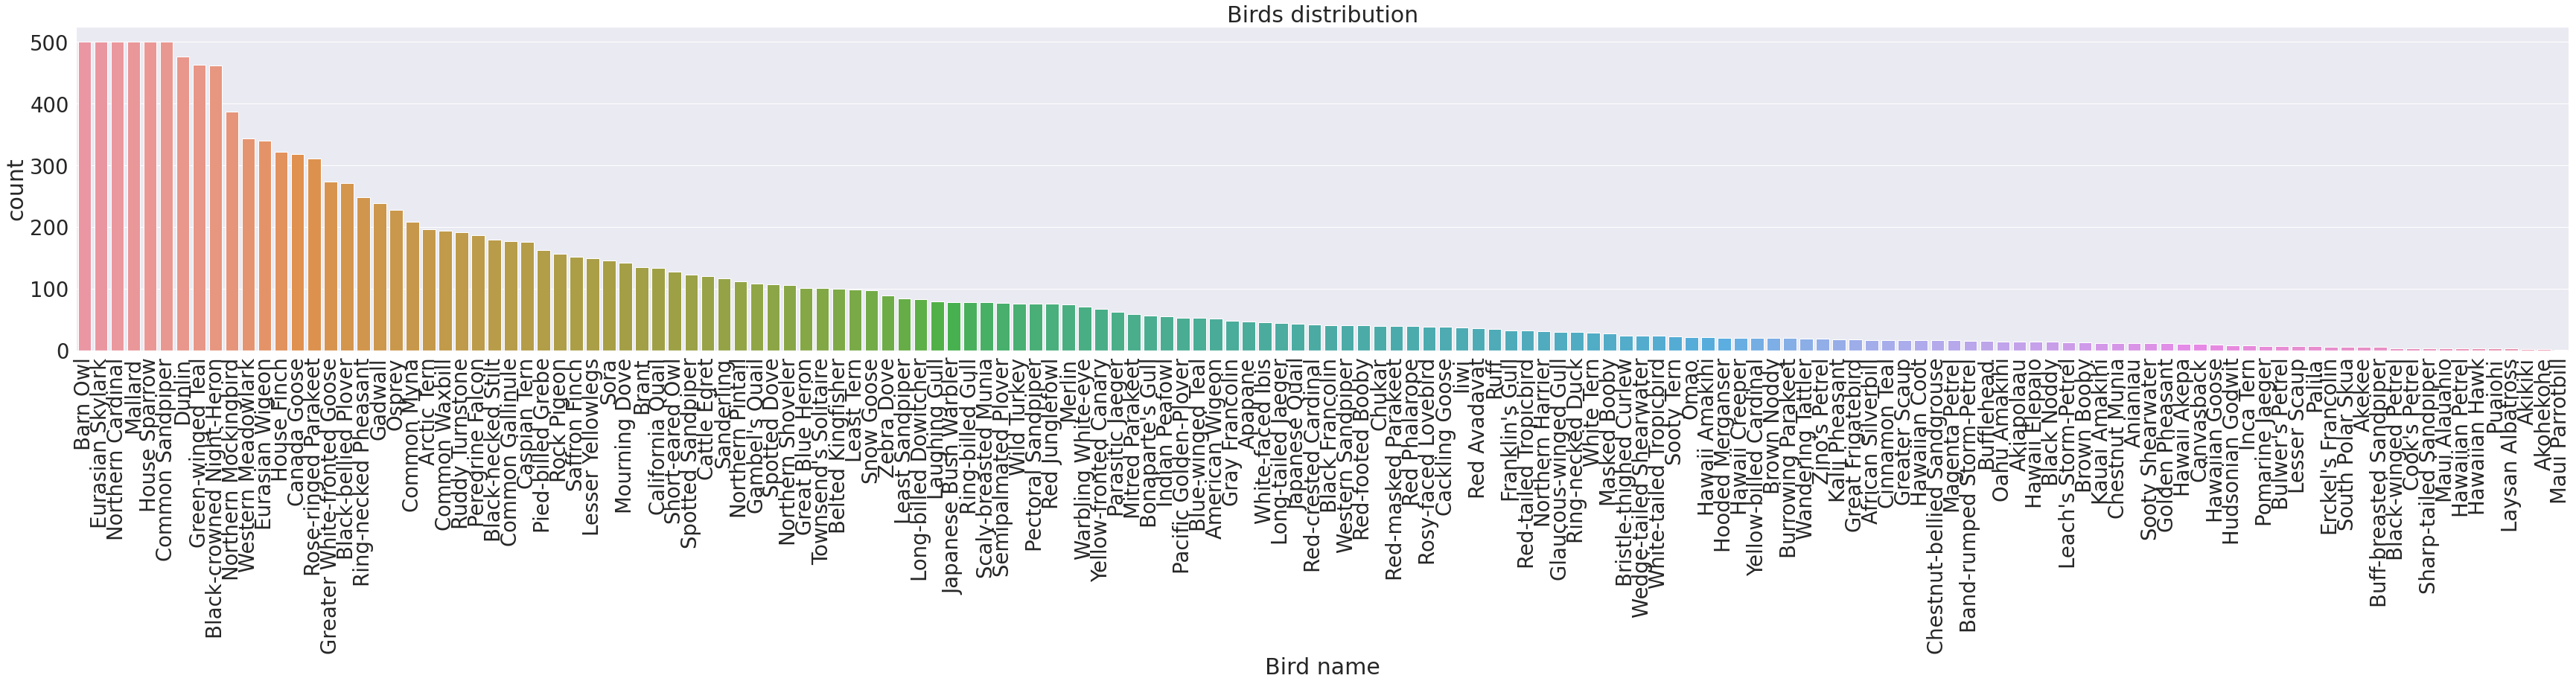

In [ ]:
# Birds distribution
fig, ax = plt.subplots(figsize=(60, 8))
sns.countplot(data=train, x='common_name', ax=ax, order=train['common_name'].value_counts().index).set(title='Birds distribution')
ax.set_xlabel("Bird name")
plt.xticks(rotation=90);

[Text(0.5, 1.0, 'rating distribution')]

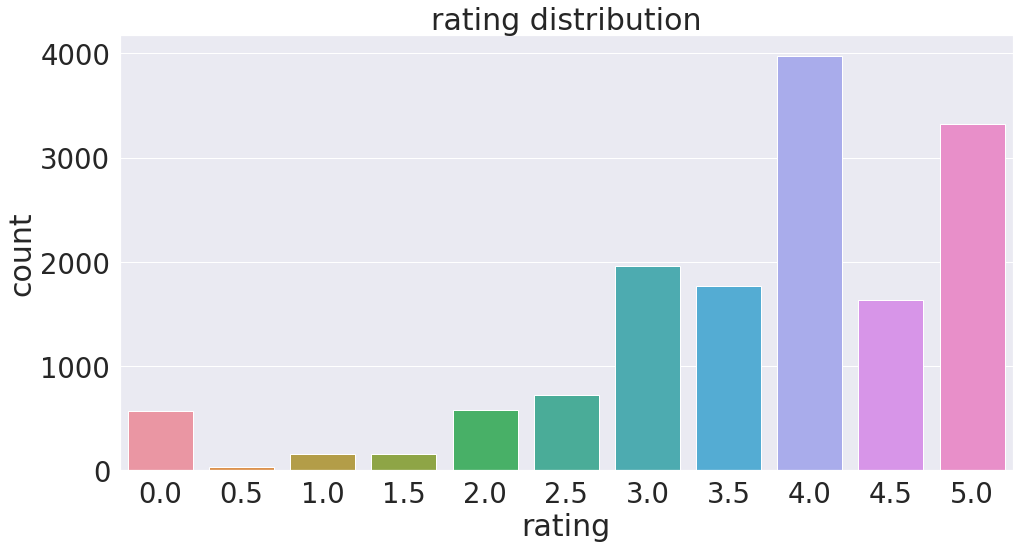

In [ ]:
sns.set(font_scale = 2.5)
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data=train, x='rating', ax=ax).set(title='rating distribution')

[Text(0.5, 1.0, 'Distribution of amount of second labels')]

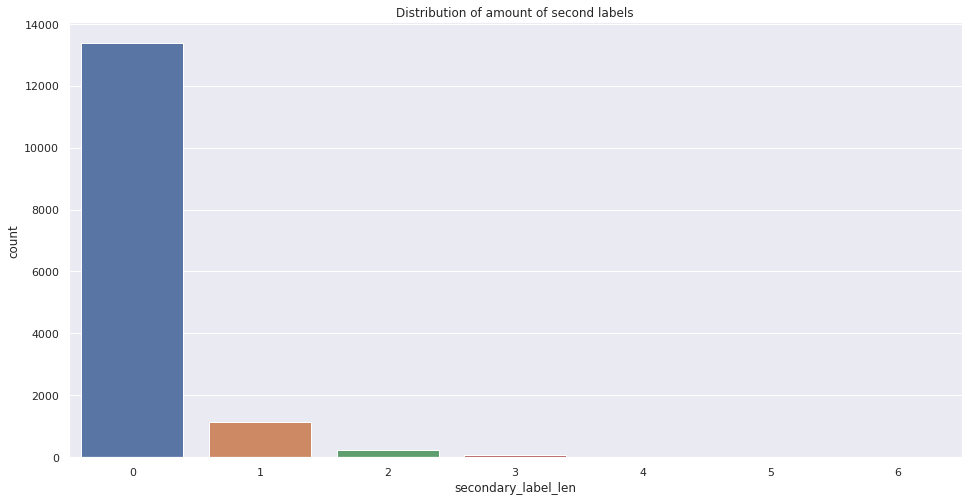

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data=train, x='secondary_label_len', ax=ax).set(title='Distribution of amount of second labels')

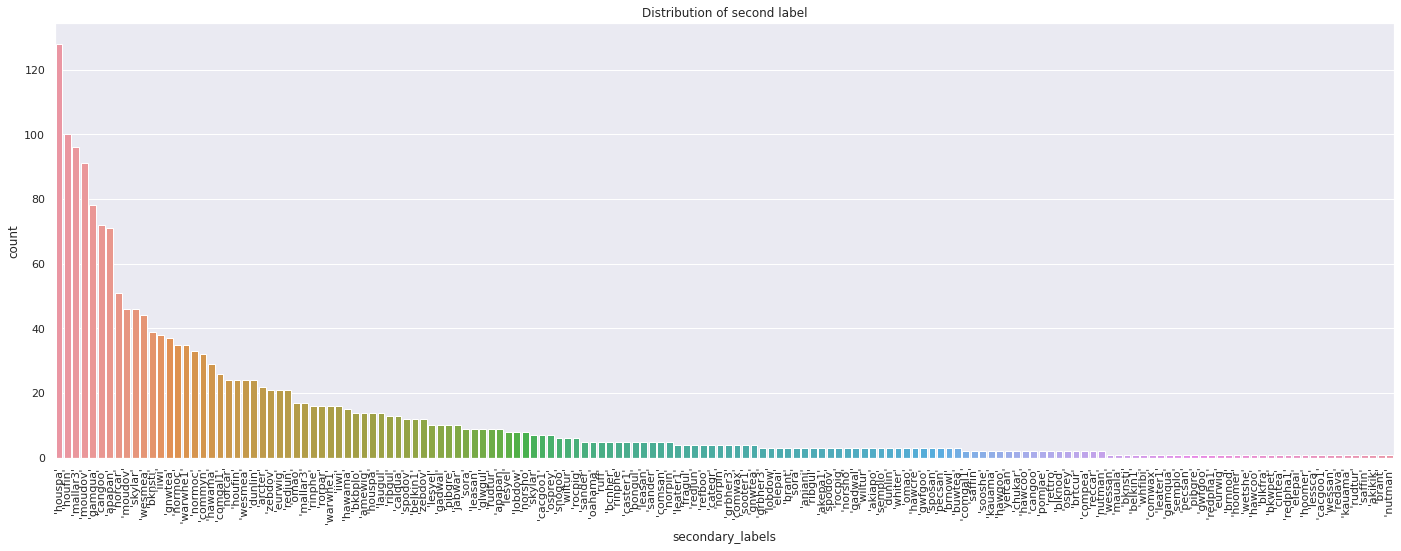

In [ ]:
values = [df_secondary_labels[col].values.tolist() for col in df_secondary_labels.columns]
values = np.array(values)
df_values = pd.DataFrame(values.flatten(), columns=['secondary_labels'])

fig, ax = plt.subplots(figsize=(24, 8))
sns.countplot(data = df_values, x='secondary_labels', ax=ax, order=df_values['secondary_labels'].value_counts().index).set(title='Distribution of second label')
plt.xticks(rotation=90);

[Text(0.5, 1.0, 'Type distribution')]

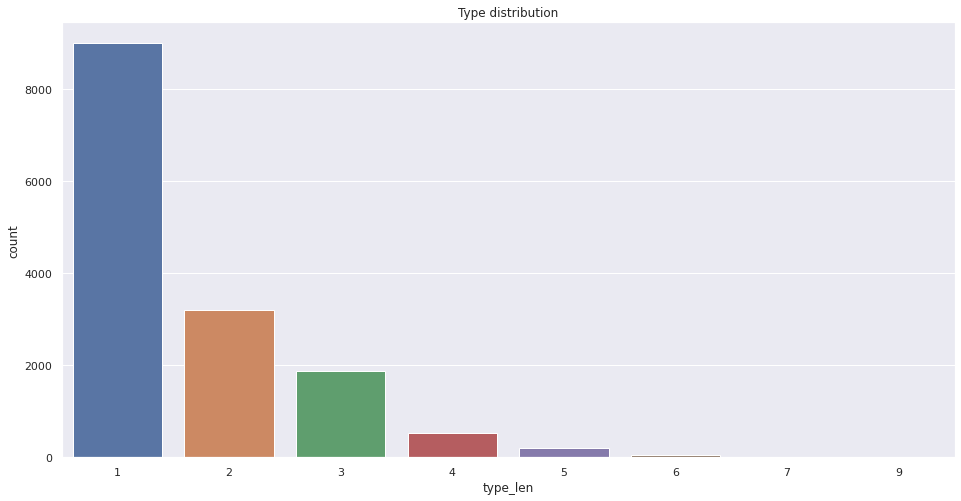

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.countplot(data=train, x='type_len', ax=ax).set(title="Type distribution")

In [ ]:
fig = px.scatter_geo(
    train,
    lat="latitude",
    lon="longitude",
    color="common_name",
    width=1_000,
    height=500,
    title="World distribution",
)
fig.show()

In [ ]:
times = []
from tqdm import tqdm
for file_path in tqdm(train["filename"]):
    audio, sample_rate = torchaudio.load(dataset_config.train_folder / file_path)
    # Ensure the audio is mono channel
    audio = torch.mean(audio, dim=0)
    length = audio.shape[0] / sample_rate
    times.append(length)

100%|██████████| 14852/14852 [27:40<00:00,  8.95it/s]


In [ ]:
times_int = [int(x/10) for x in times]

In [ ]:
times_int3 = [x  if x < 30 else 30 for x in times_int]

In [ ]:
from collections import Counter
print(Counter(times_int3).most_common())
print(sum([x[1] for x in list(Counter(times_int3).most_common())[1:]]))


[(30, 5984), (5, 534), (10, 517), (6, 512), (7, 460), (9, 418), (8, 402), (11, 390), (13, 375), (12, 372), (14, 338), (4, 327), (15, 317), (17, 312), (16, 305), (18, 284), (20, 283), (3, 276), (19, 258), (21, 242), (2, 235), (25, 234), (22, 218), (23, 208), (24, 203), (28, 193), (26, 175), (27, 165), (29, 157), (1, 130), (0, 28)]
8868


In [ ]:
from collections import Counter
Counter(times_int).most_common()

In [ ]:
axis[-1] = "300+"

In [ ]:
axis = [f"{10*x}-{10*x + 10}" for x in sorted(list(set(times_int2)))]

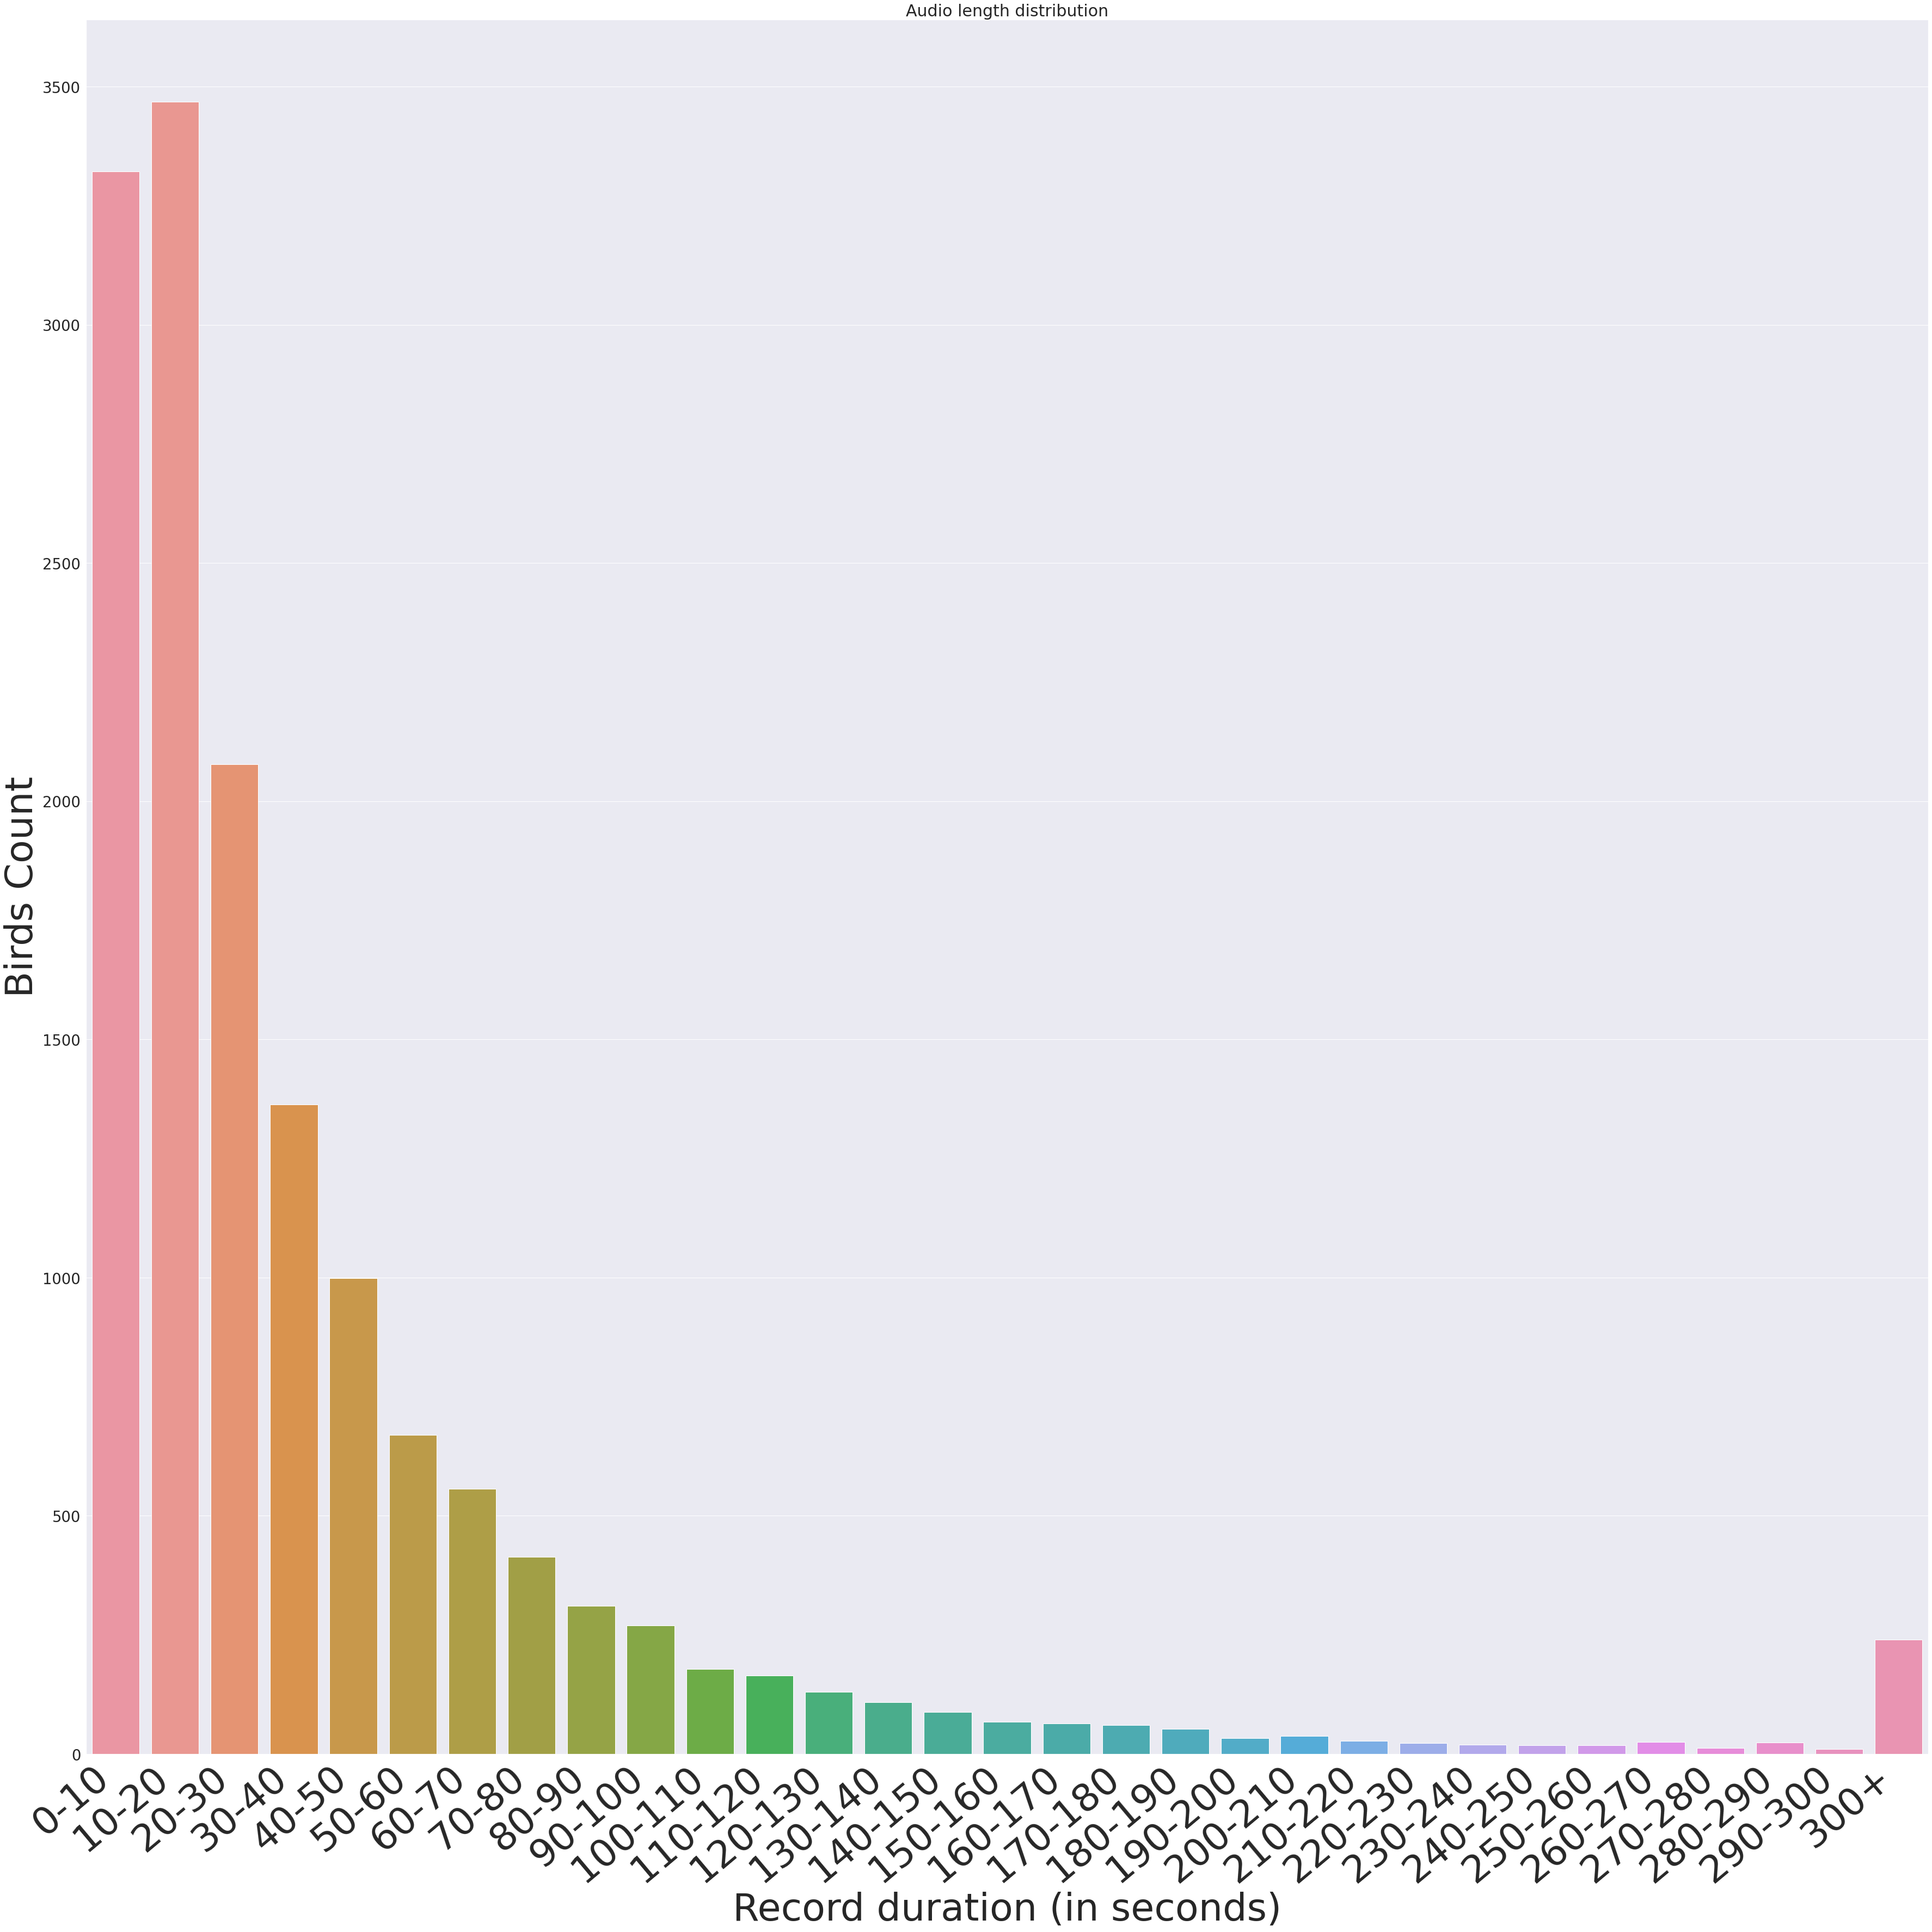

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(50, 50)

ax = sns.countplot(x=times_int2, ax=ax)
ax.set(title="Audio length distribution")

ax.set_xticklabels(axis, rotation=40, ha="right", fontsize = 70)
ax.set_xlabel("Record duration (in seconds)", fontsize = 70)
ax.set_ylabel("Birds Count", fontsize = 70)

plt.tight_layout()
plt.show()

# sns.countplot(x=times_int2, ax=ax).set(title="audio length distribution").set

[Text(0.5, 1.0, 'audio length distribution')]

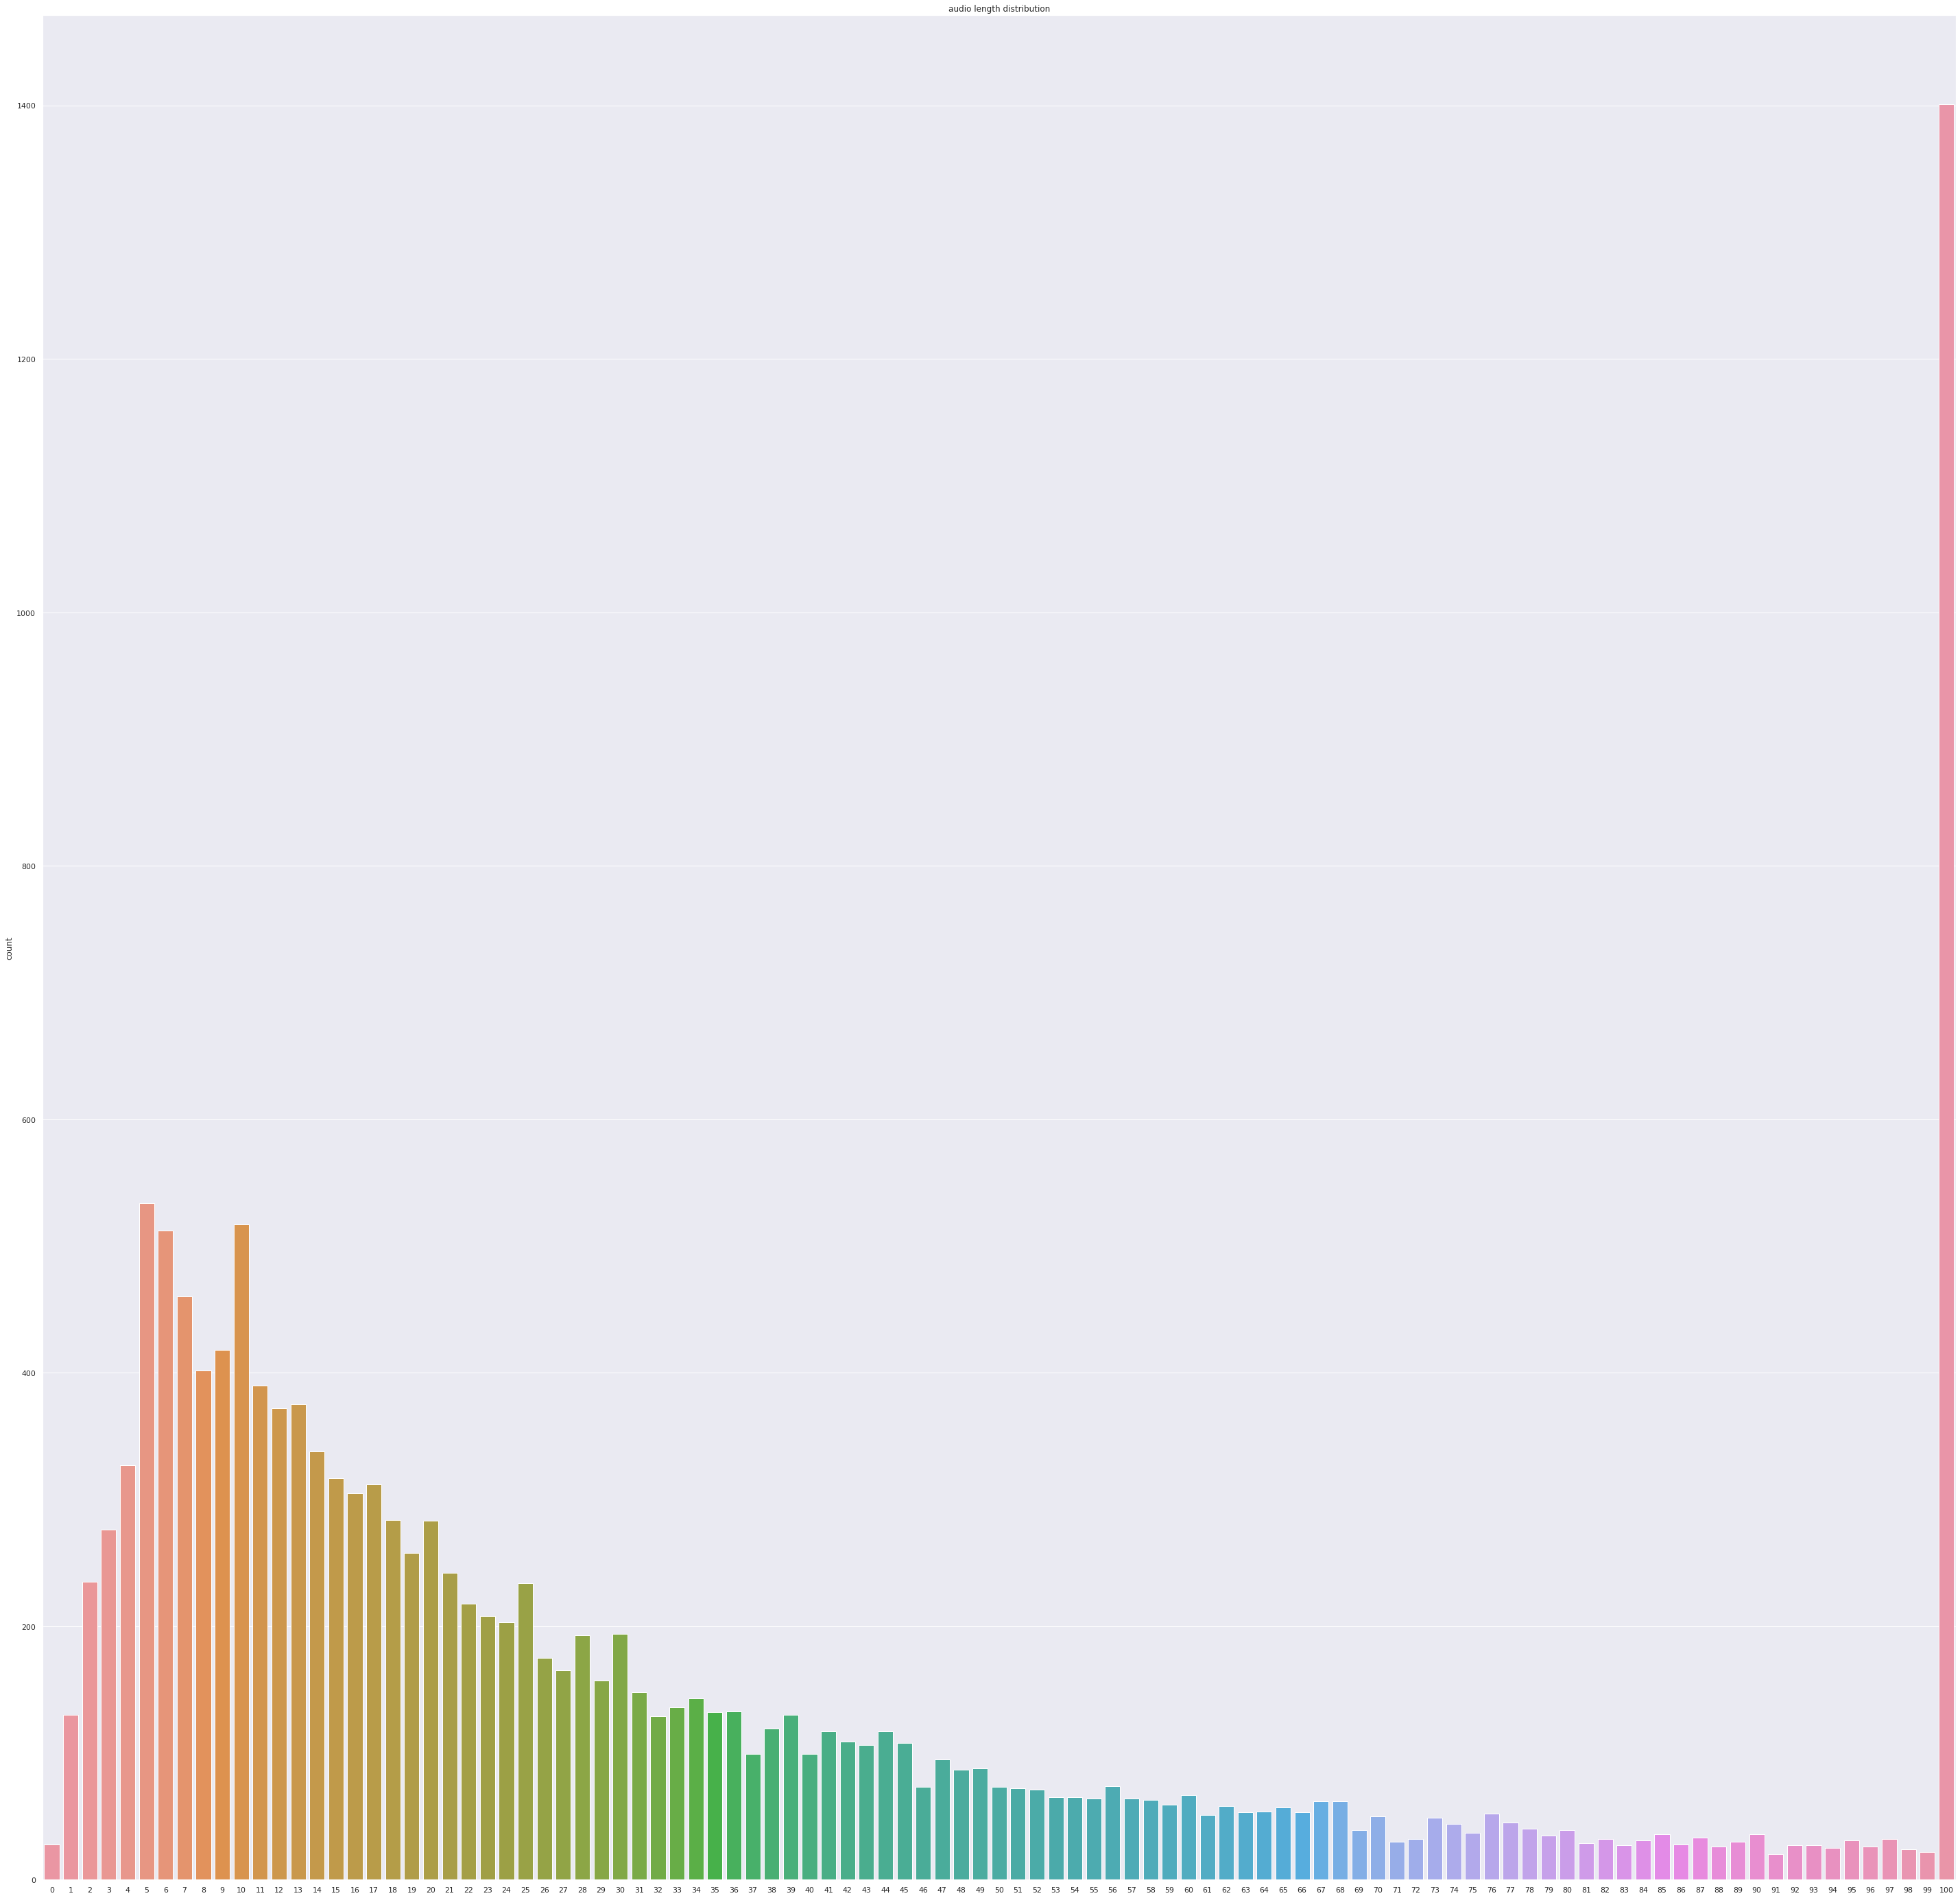

In [ ]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(50, 50)
sns.countplot(x=times_int2, ax=ax).set(title="audio length distribution")

# Understand the birds

In [ ]:
# axample to audio
fn = train["filename"].values[1]
ipd.Audio(f"{BASE_DIR}/train_audio/{fn}")

In [ ]:
import random
def get_bird_sound(bird_name):
    fns = train[train['common_name'] == bird_name]["filename"].values
    fn = fns[random.randint(0, len(fns))]
    audio = ipd.Audio(f"{BASE_DIR}/train_audio/{fn}")
    return audio


In [ ]:
def get_signal(path):
    """ Get audio signal from librosa """
    signal, sr = librosa.load(path)
    return signal

def plot_signal(path):
    """ Plots the time-amplitude graph of the audio signal """
    signal = get_signal(path)
    plt.figure(figsize=(12,8))
    librosa.display.waveshow(signal)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Audio Signal - Time-Amplitude")
    plt.show()

def plot_bird_signal(bird_name, times=3):
    fns = train[train['common_name'] == bird_name]["filename"].values
    for i in range(times):
        fn = fns[random.randint(0, len(fns))]
        plot_signal(f"{BASE_DIR}/train_audio/{fn}")

## Barn Owl

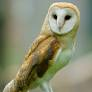

(picture from wikipedia)

In [ ]:
# Most frequent birsd is 'Barn owl"
fig = px.scatter_geo(
    train[train['common_name'] == 'Barn Owl'],
    lat="latitude",
    lon="longitude",
    color="rating",
    width=1000,
    height=500,
    title="Barn-OWl Distribution",
)
fig.show()

In [ ]:
get_bird_sound("Barn Owl")

In [ ]:
get_bird_sound("Barn Owl")

In [ ]:
get_bird_sound("Barn Owl")

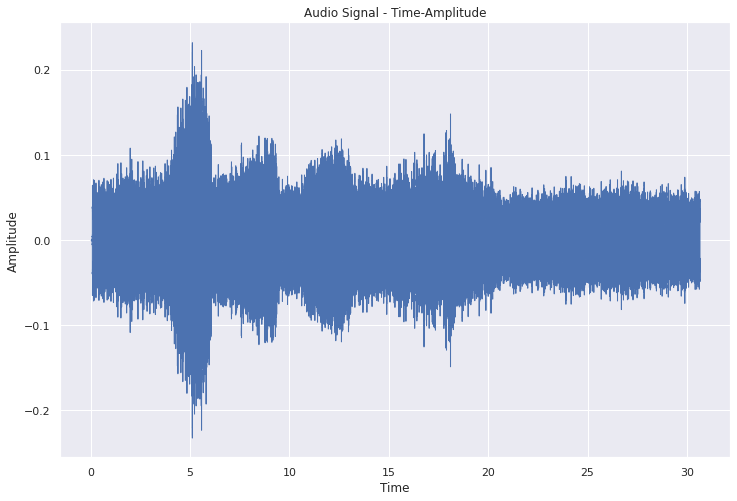

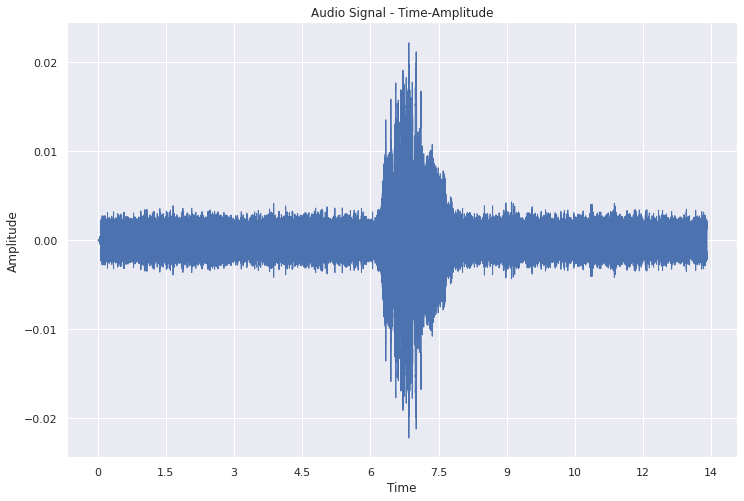

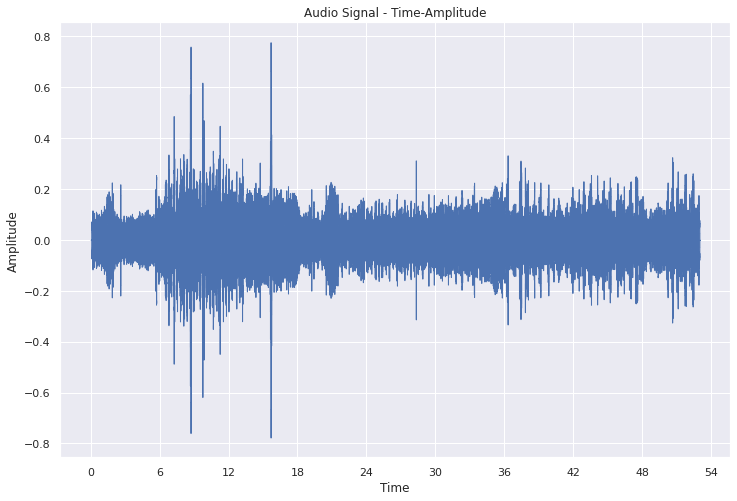

In [ ]:
plot_bird_signal("Barn Owl")

##  Merlin

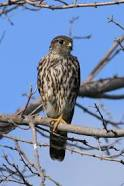

(image from wikipedia)

In [ ]:
fig = px.scatter_geo(
    train[train['common_name'] == 'Merlin'],
    lat="latitude",
    lon="longitude",
    color="rating",
    width=1000,
    height=500,
    title="Merlin Distribution",
)
fig.show()

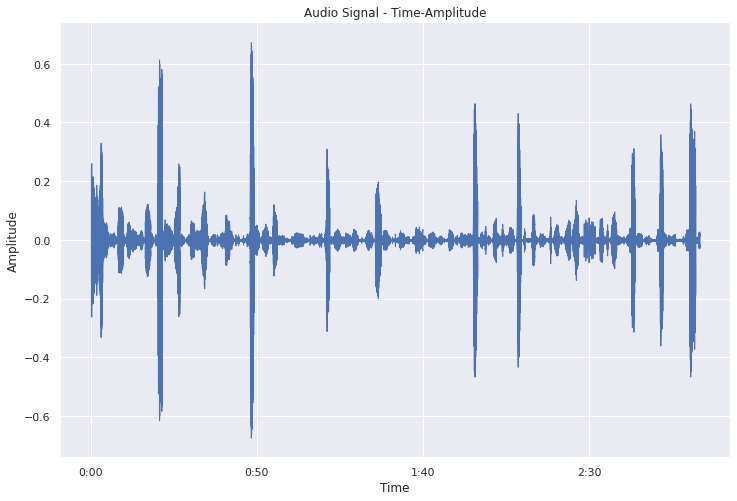

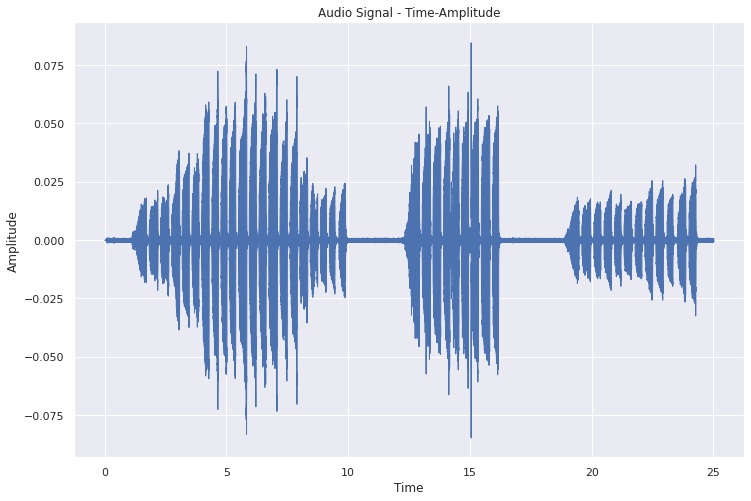

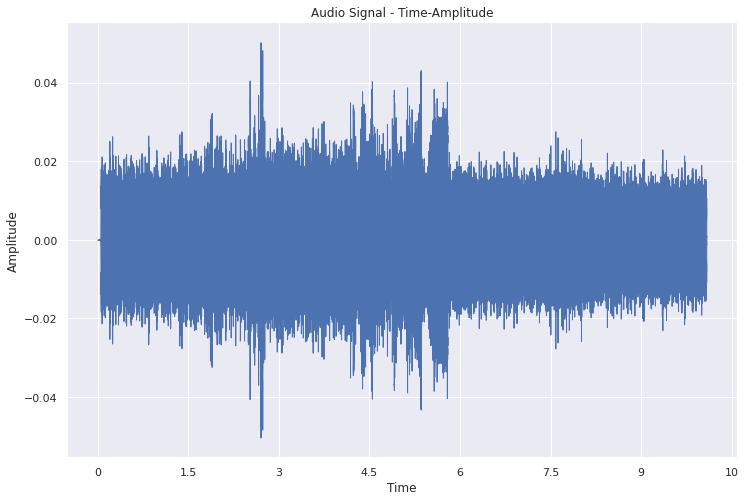

In [ ]:
plot_bird_signal("Merlin")

In [ ]:
get_bird_sound("Barn Owl")

In [ ]:
train.head()

primary_label                secondary_labels                     type  \
0       afrsil1                              []  ['call', 'flight call']   
1       afrsil1  ['houspa', 'redava', 'zebdov']                 ['call']   
2       afrsil1                              []         ['call', 'song']   
3       afrsil1                              []   ['alarm call', 'call']   
4       afrsil1                              []          ['flight call']   

   latitude  longitude  scientific_name         common_name          author  \
0   12.3910    -1.4930  Euodice cantans  African Silverbill       Bram Piot   
1   19.8801  -155.7254  Euodice cantans  African Silverbill        Dan Lane   
2   16.2901   -16.0321  Euodice cantans  African Silverbill       Bram Piot   
3   17.0922    54.2958  Euodice cantans  African Silverbill  Oscar Campbell   
4   21.4581  -157.7252  Euodice cantans  African Silverbill   Ross Gallardy   

                                             license  rating   time  \
0  Creative Commons Attribution-NonCommercial-Sha...     2.5  08:00   
1  Creative Commons Attribution-NonCommercial-Sha...     3.5  08:30   
2  Creative Commons Attribution-NonCommercial-Sha...     4.0  11:30   
3  Creative Commons Attribution-NonCommercial-Sha...     4.0  11:00   
4  Creative Commons Attribution-NonCommercial-Sha...     3.0  16:30   

                                 url              filename  \
0  https://www.xeno-canto.org/125458  afrsil1/XC125458.ogg   
1  https://www.xeno-canto.org/175522  afrsil1/XC175522.ogg   
2  https://www.xeno-canto.org/177993  afrsil1/XC177993.ogg   
3  https://www.xeno-canto.org/205893  afrsil1/XC205893.ogg   
4  https://www.xeno-canto.org/207431  afrsil1/XC207431.ogg   

   secondary_label_len  type_len  
0                    1         2  
1                    3         1  
2                    1         2  
3                    1         2  
4                    1         1

In [ ]:
fn = train["filename"].values[1]
ipd.Audio(f"{BASE_DIR}/train_audio/{fn}")

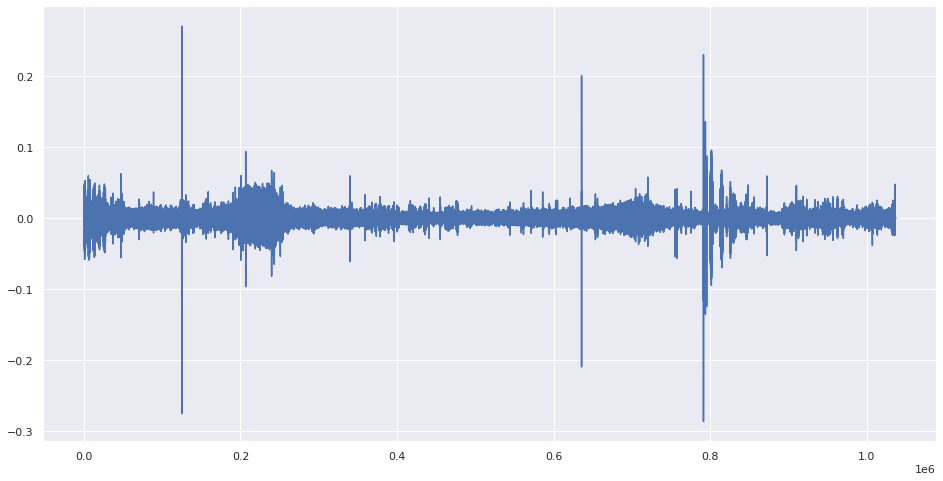

In [ ]:
y, sr = librosa.load(f"{BASE_DIR}/train_audio/{fn}")
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(x=np.arange(len(y)), y=y, ax=ax);

# Dataset classes 

In this section we define all the config variables for the learning process

In [ ]:
from torch.utils.data import Dataset
from typing import List, Optional
import os
import torch
from attr import define, field
from numpy import ndarray
from torch import tensor
from torch.optim import Optimizer
from pandas import DataFrame
import json
import torchaudio
import torchaudio.transforms as T
from torch.utils.data import DataLoader
import torch.optim as optim


def _scored_birds_to_list(test_path):
    with test_path.open() as f:
        scored_birds = json.load(f)
    return scored_birds

def _get_all_birds(birds_path):
    return [x.name for x in birds_path.iterdir()]

@define
class DatasetConfig:
    train_folder: Path = field(repr=False)
    n_fft: int = field(default=2048)
    n_mels: int = field(default=128)
    hop_length: int = field(default=512)
    sample_rate: int = field(default=32000)
    secondary_score: float = field(default=0.2)
    scored_birds : List[str] = field(default=None, converter=_scored_birds_to_list)
    all_birds: List[str] = field(default=None, converter=_get_all_birds)
    test_split_seconds: int = field(repr=False, default = 5)
    min_rating: int = field(repr=False, default = 1.5)
    device = field(default=torch.device("cuda:0" if torch.cuda.is_available() else "cpu"), repr=False)
    train_durations: int = field(default=8)

    birds_amount: int = field(default=80)   


In [ ]:
from tqdm import tqdm
from torchvision.transforms import transforms

class BirdDatasetTrain(Dataset):
    """
    Dataset object of the bird chirps
    On the first time, we convert all the recordings to mel spectrogram image
    """
    def __init__(self, train_df, dataset_config, bird_encoder=None, data=None, is_train=True):

        self.dataset_config = dataset_config
        self.train_df = train_df.copy()
        self.is_train = is_train
        self.train_durations = dataset_config.train_durations
        self.relevant_birds = self.dataset_config.all_birds
        self.bird_encoder = bird_encoder
        if bird_encoder is None:
            self.bird_encoder = {bird: idx for idx, bird in enumerate(self.relevant_birds)}
        self.bird_decoder = {idx: bird for bird, idx in self.bird_encoder.items()}
        try:
            self.train_df["secondary_labels"] = self.train_df["secondary_labels"].apply(eval)
        except Exception:
            print("cant eval")
        self.train_labels = self.get_train_labels()
        self.mel_spectrogram = T.MelSpectrogram(
            sample_rate=self.dataset_config.sample_rate,
            n_fft=self.dataset_config.n_fft,
            n_mels=self.dataset_config.n_mels
        )

        if data is None:
            self.data = self._load_data()
        else:
            self.data = data

    def get_subset(self, subset):
        self.data = np.asanyarray(self.data)
        self.data = self.data[subset]
        self.train_df = self.train_df.iloc[subset]
        self.train_labels = self.train_labels.iloc[subset]

    def get_train_labels(self):
        train_primary = self.train_df['primary_label'].apply(self.bird_encoder.get)
        labels = pd.DataFrame(0, index=self.train_df.index, columns=self.relevant_birds, dtype=float)
        for i in self.train_df.index:
            labels.at[i, self.bird_decoder[train_primary.loc[i]]] = 1
            for j in range(len(self.train_df['secondary_labels'][i])):
                labels.at[i, self.train_df['secondary_labels'][i][j]] = self.dataset_config.secondary_score
        return labels

    def _load_data(self):
        """
        This function loads the mel spectrogram of the recordings
        """
        data = []
        for i in tqdm(range(len(self))):
            remove = []
            x, y = self._get_mel_spec(i)
            if x is not None:
                data.append((x.to(dataset_config.device), y.to(dataset_config.device)))
            else:
                remove.append(y)
        self.train_df.drop(remove)
        return data
    def __getitem__(self, idx):
        if idx > len(self.train_df):
            idx = self.data[idx]
        transform = transforms.Compose([
            transforms.RandomHorizontalFlip(0.5), transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))])
        a, b = self.data[idx]
        a = normalize_image(a.float().reshape(a.shape[1], -1))
        if self.is_train:
            a = transform(a).float()
        else:
            a = a.float()
        return a.to(dataset_config.device), tensor(b).to(torch.float).to(dataset_config.device)

    def _get_mel_spec(self, idx):
        row = self.train_df.iloc[idx]
        label = self.train_labels.iloc[idx]
        file_path = self.dataset_config.train_folder / row["filename"]
        try:
            audio, sample_rate = librosa.load(file_path, sr=self.dataset_config.sample_rate)
        except Exception:
            print(f"there was an error, index {idx}")
            return None, row.index

        clips = librosa.effects.split(audio, top_db=35)
        wav_data = []
        for c in clips:
            data = audio[c[0]: c[1]]
            wav_data.extend(data)
        
        audio = np.asanyarray(wav_data)
        audio = self.change_wave_duration(audio, sample_rate)
        S = librosa.feature.melspectrogram(
            audio, sr=sample_rate, n_fft=self.dataset_config.n_fft, hop_length=self.dataset_config.hop_length, n_mels=self.dataset_config.n_mels
            )
        S_DB = librosa.power_to_db(S, ref=np.max)
        return torch.tensor(S_DB.reshape(1, S_DB.shape[0], -1)), tensor(label).to(torch.float)

    def __len__(self):
        return len(self.train_df)
    
    def change_wave_duration(self, audio, sample_rate):
        length = audio.shape[0]
        duration_length = sample_rate * self.train_durations
        new_audio = audio
        if duration_length < length:
            new_audio = audio[:duration_length]
        elif length < duration_length:
            new_audio = np.zeros((duration_length))
            new_audio[:length] = audio
            new_audio[length: length + min(length, duration_length - length)] = audio[:min(length, duration_length - length)]      
        return new_audio

def normalize_image(X):
    mean = X.mean()
    std = X.std()
    X = (X - mean) / (std + 1e-7)

    norm_min, norm_max = X.min(), X.max()
    
    if (norm_max - norm_min) > 1e-7:
        V = X
        V[V < norm_min] = norm_min
        V[V > norm_max] = norm_max
        V = 255 * (V - norm_min) / (norm_max - norm_min)
        V = V.to(torch.uint8)
    else:
        V = np.zeros_like(X, dtype=np.uint8)

    VV = V.reshape(1, V.shape[0], -1)
    final_image = torch.cat([VV, VV, VV], axis=0)
    return final_image

# Define the variables for training

load the data object and convert recordings to mel spec images


In [ ]:
import pickle

train_path = Path('/content/drive/MyDrive/TAU/DeepLearning/project/checkpoint_train.pkl')
if train_path.is_file():
    with open(str(train_path), "rb") as input_file:
        checkpoint = pickle.load(input_file)
    dataset_config = checkpoint["dataset_config"]
    train = checkpoint["train_ds"]
else:
    dataset_config = DatasetConfig(train_folder=train_dir, all_birds=train_dir, scored_birds=scored_birds)
    train = BirdDatasetTrain(train, dataset_config)
    checkpoint = {"dataset_config": dataset_config, "train_ds": train}
    with open(str(train_path), "wb") as input_file:
        pickle.dump(checkpoint, input_file)

split train and test

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import WeightedRandomSampler

train_val_df, test_df = train_test_split(np.arange(len(train.train_df.index)), test_size=0.3)

train.train_df.shape, test_df.shape, train_val_df.shape

test_indexes = np.array([], dtype=int)
train_indexes = np.array([], dtype=int)
for name in train.train_df.common_name.unique():
    lines = np.where(train.train_df['common_name']==name)[0]
    test_lines = np.random.choice(lines, int(len(lines)*0.3), replace=False)
    test_indexes = np.append(test_indexes, test_lines)
    train_indexes = np.append(train_indexes, np.setdiff1d(lines, test_lines))

dataset_config = DatasetConfig(train_folder=train_dir, all_birds=train_dir, scored_birds=scored_birds)
test_df1 = BirdDatasetTrain(train.train_df, dataset_config, data=train.data)
test_df1.get_subset(test_indexes)
test_df = BirdDatasetTrain(test_df1.train_df, dataset_config, data=test_df1.data, is_train=False)
print(len(test_df))

dataset_config = DatasetConfig(train_folder=train_dir, all_birds=train_dir, scored_birds=scored_birds)
train_val_df1 = BirdDatasetTrain(train.train_df, dataset_config, data=train.data)
train_val_df1.get_subset(train_indexes)
train_val_df = BirdDatasetTrain(train_val_df1.train_df, dataset_config, data=train_val_df1.data)
print(len(train_val_df))    

batch_size = 150

train_loader = DataLoader(dataset=train_val_df, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_df, batch_size=batch_size, shuffle=True)

# Mel spectrogram effect

In [ ]:
def get_audio_data(fn, is_base=True):
    path = fn
    if is_base:
        path = f"{BASE_DIR}/train_audio/{fn}"
        
    y, sr = librosa.load(path)
    

    fig, ax = plt.subplots(figsize=(16, 8))
    librosa.display.waveplot(y, sr=sr)
    plt.tight_layout()
    ax.set_xlabel('Time (seconds)', fontsize=25)
    ax.set_ylabel('Amplitude', fontsize=25)
    plt.xticks(fontsize=20)


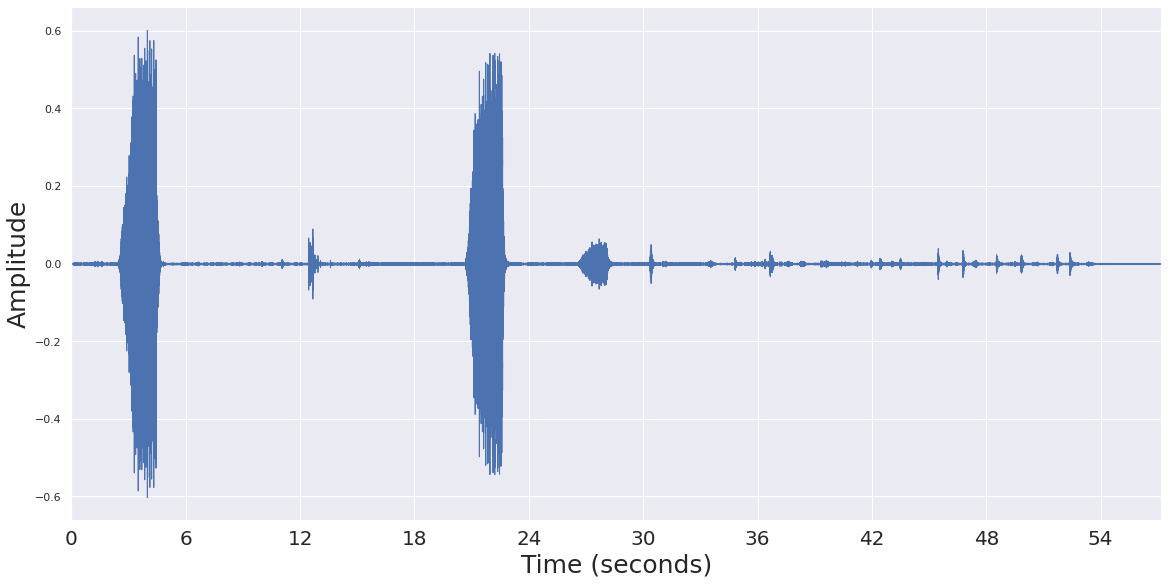

In [ ]:
fn = "brnowl/XC186612.ogg" 
new_path = Path(f'train/train_audio/{fn}')
get_audio_data(new_path, False)

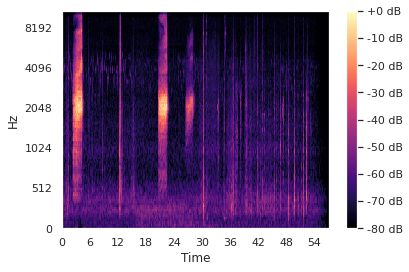

In [ ]:
audio, sr = librosa.load(new_path)

S = librosa.feature.melspectrogram(
    audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128
    )
S_DB = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

(1260864,) 22050


(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text major ticklabel objects>)

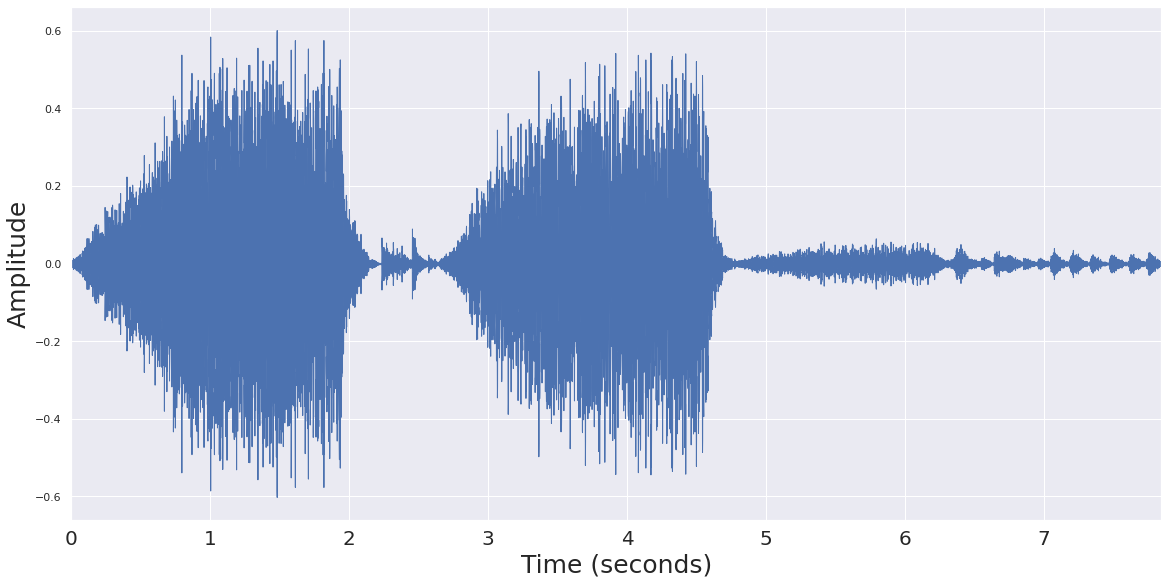

In [ ]:
audio, sr = librosa.load(new_path)

# audio, sample_rate = torchaudio.load(file_path)
# Ensure the audio is mono channel

#audio = torch.mean(torch.tensor(audio), dim=0)
print(audio.shape, sr)

clips = librosa.effects.split(audio, top_db=35)
wav_data = []
for c in clips:
    data = audio[c[0]: c[1]]
    wav_data.extend(data)
y = np.asanyarray(wav_data)

fig, ax = plt.subplots(figsize=(16, 8))
librosa.display.waveplot(y, sr=sr)
plt.tight_layout()
# sns.lineplot(x=np.arange(len(y)), y=y, ax=ax)
ax.set_xlabel('Time (seconds)', fontsize=25)
ax.set_ylabel('Amplitude', fontsize=25)
plt.xticks(fontsize=20)

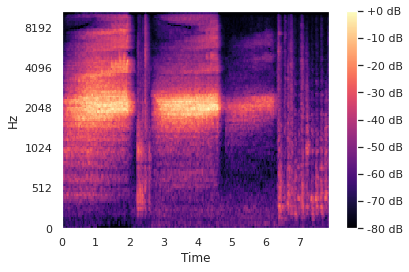

In [ ]:
audio = y
S = librosa.feature.melspectrogram(
    audio, sr=sr, n_fft=2048, hop_length=512, n_mels=128
    )
S_DB = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

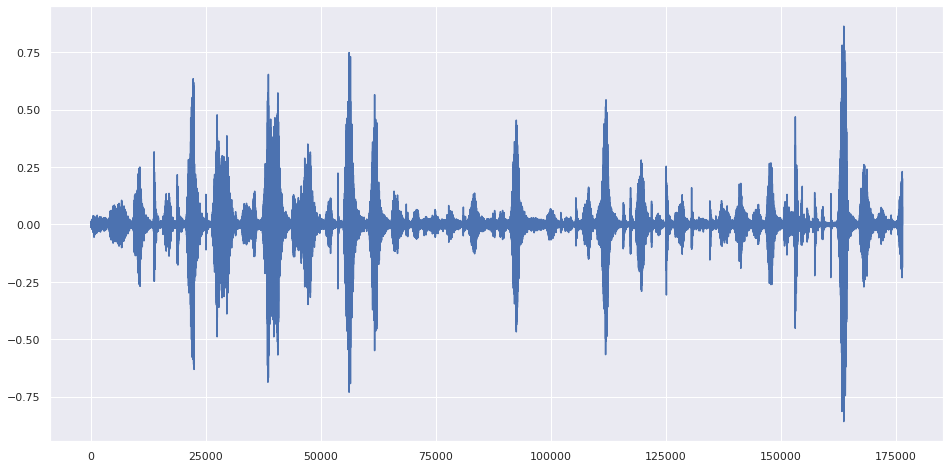

In [ ]:
import soundfile as sf

get_audio_data('train/tmp/a.wav', False)

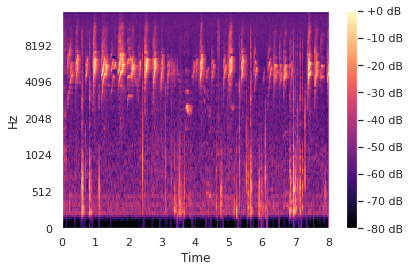

In [ ]:
librosa.display.specshow(S_DB, sr=32000, hop_length=512, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

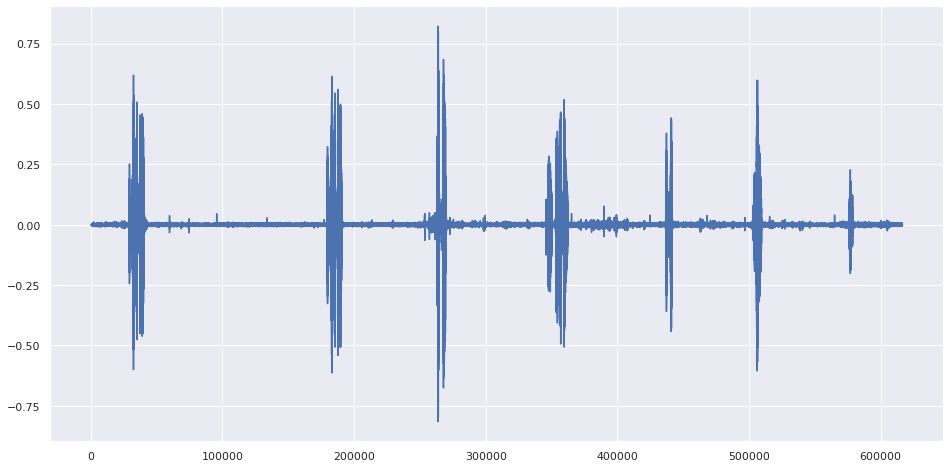

In [ ]:
fn = 'palila/XC145608.ogg'
get_audio_data(fn)

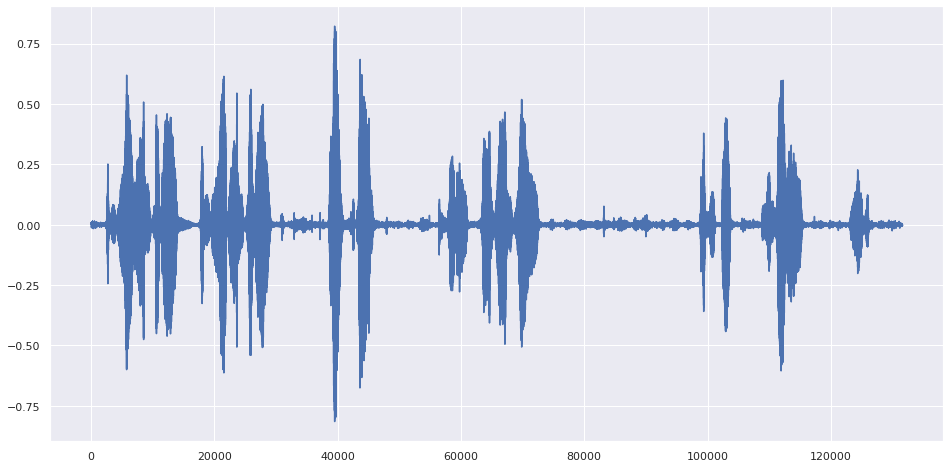

In [ ]:
import soundfile as sf
fn = 'palila/XC145608.ogg'
audio, sr = librosa.load(f"{BASE_DIR}/train_audio/{fn}")
clips = librosa.effects.split(audio, top_db=35)

wav_data = []
for c in clips:
    # print(c)
    data = audio[c[0]: c[1]]
    wav_data.extend(data)
f_path = 'train/tmp/6s.wav'
sf.write(f_path, wav_data, sr)    

get_audio_data(f_path, False)


# Deep models

In [ ]:
class CnnModel(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.num_classes = num_classes

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 16, (3,3)),
            nn.ReLU(),
            nn.Dropout(p=0.45),
            nn.AvgPool2d((2, 2)),
            nn.BatchNorm2d(16)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, (3, 3)),
            nn.ReLU(),
            nn.AvgPool2d((2, 2)),
            nn.Dropout(p=0.45),
            nn.BatchNorm2d(32)
        )       
        self.conv3 = nn.Sequential(
            nn.Conv2d(32, 64, (3,3), stride=2),
            nn.ReLU(),
            nn.AvgPool2d((2, 2)),
            nn.BatchNorm2d(64)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(64, 128, (3,3), stride=2),
            nn.ReLU(),
            nn.AvgPool2d((2, 2)),
            nn.Dropout(p=0.5),
            nn.BatchNorm2d(128)
        )     

        self.fc00 = nn.Sequential(
            nn.Linear(1152, 800),
            nn.BatchNorm1d(800),
            nn.Dropout(p=0.45),
            nn.ReLU()
        )
        self.fc01 = nn.Sequential(
            nn.Linear(800, 256),
            nn.BatchNorm1d(256),
            nn.Dropout(p=0.45),
            nn.ReLU()
        )
        self.fc2 = nn.Linear(256, self.num_classes)


        self.conv1.apply(init_kernel)
        self.conv2.apply(init_kernel)
        self.conv3.apply(init_kernel)
        self.conv4.apply(init_kernel)
        self.fc00.apply(init_kernel)
        self.fc01.apply(init_kernel)
        self.fc2.apply(init_kernel)


    def forward(self, x):
        scores_matrix = self.conv1(x)
        scores_matrix = self.conv11(scores_matrix)
        scores_matrix = self.conv2(scores_matrix)
        scores_matrix = self.conv3(scores_matrix)
        scores_matrix = self.conv4(scores_matrix)
        scores_matrix = scores_matrix.view(scores_matrix.shape[0], -1)
        scores_matrix = self.fc00(scores_matrix)
        scores_matrix = self.fc01(scores_matrix)
        scores_matrix = self.fc2(scores_matrix)
        return scores_matrix

def init_kernel(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear): 
        nn.init.kaiming_normal_(m.weight),
        nn.init.zeros_(m.bias)

def test_CnnNet():
    x = torch.zeros((4, 3, 128, 501), dtype=torch.float32)
    model = CnnModel(len(dataset_config.all_birds))
    
    scores = model(x)
    print(scores.size())


In [ ]:
from torchvision import models

class BirdCLEFResnet(nn.Module):
    def __init__(self, num_classes):
        super(BirdCLEFResnet, self).__init__()
        self.base_model = models.__getattribute__('resnet50')(pretrained=True)
        for param in self.base_model.parameters():
            param.requires_grad = False
            
        in_features = self.base_model.fc.in_features
        
        self.base_model.fc = nn.Sequential(
            nn.Linear(in_features, 1024), 
            nn.ReLU(), 
            nn.Dropout(p=0.2),
            nn.Linear(1024, 512), 
            nn.ReLU(), 
            nn.Dropout(p=0.2),
            nn.Linear(512, num_classes))
        
    def forward(self, x):
        x = self.base_model(x)
        return x

In [ ]:
test_CnnModel()

torch.Size([4, 152])


# Train functions

In [ ]:
import time
import random



def train_model(model, loader, optimizer, epochs, model_path=None):
    
    train_acc_history = []
    val_acc_history = []
    loss_function = nn.CrossEntropyLoss()
    strings = time.strftime("%H:%M:%S")
    print(strings + " Start")
    for e in range(epochs):
        for t, (imgs, lbls) in enumerate(loader):

            # put model to training mode
            model.train()
            
            imgs = imgs + torch.tensor(np.random.normal(0, 1, imgs.shape)).float().to(dataset_config.device)
            scores = model(imgs)
            loss = loss_function(scores, lbls)

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()

        train_acc = check_accuracy(train_loader, model)
        val_acc = check_accuracy(test_loader, model)
        train_acc_history.append(train_acc)
        val_acc_history.append(val_acc)
        if model_path is not None:
            torch.save(model.state_dict(), model_path)
        strings = time.strftime("%H:%M:%S")
        print(strings + ' Epoch %d, loss = %.4f, Got train acc of: (%.2f) and test acc of: (%.2f)' % (e, loss.item(), train_acc, val_acc))
    return train_acc_history, val_acc_history

In [ ]:
def check_accuracy(loader, model, verbose=False):
    num_correct = 0
    num_samples = 0

    model.eval()  
    with torch.no_grad():
        for x, y in loader:
            scores = model(x)
            scores_class = scores.argmax(axis=1)
            y_classes = y.argmax(axis=1)
            num_correct += (scores_class == y_classes).sum()
            num_samples += scores.size(0)
        acc = float(num_correct) / num_samples
        if verbose:
            print('Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
    return acc

# Train and test

04:21:32 Start
04:22:42 Epoch 0, loss = 3.8118, Got train acc of: (0.14) and test acc of: (0.14)
04:23:39 Epoch 1, loss = 3.0902, Got train acc of: (0.17) and test acc of: (0.17)
04:24:36 Epoch 2, loss = 3.2976, Got train acc of: (0.16) and test acc of: (0.19)
04:25:32 Epoch 3, loss = 2.6849, Got train acc of: (0.18) and test acc of: (0.23)
04:26:29 Epoch 4, loss = 2.6783, Got train acc of: (0.26) and test acc of: (0.22)
04:27:25 Epoch 5, loss = 2.5926, Got train acc of: (0.26) and test acc of: (0.26)
04:28:22 Epoch 6, loss = 2.4171, Got train acc of: (0.32) and test acc of: (0.28)
04:29:18 Epoch 7, loss = 2.2570, Got train acc of: (0.38) and test acc of: (0.35)
04:30:14 Epoch 8, loss = 2.4561, Got train acc of: (0.41) and test acc of: (0.37)
04:31:11 Epoch 9, loss = 2.4714, Got train acc of: (0.26) and test acc of: (0.27)
04:32:07 Epoch 10, loss = 2.2151, Got train acc of: (0.44) and test acc of: (0.40)
04:33:04 Epoch 11, loss = 1.9909, Got train acc of: (0.44) and test acc of: (0.43)

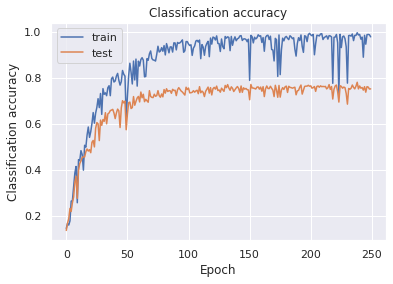

In [ ]:
# learn only 20 classes
learning_rate = 1e-3
model = CnnModel(len(train_val_df.relevant_birds)).to(dataset_config.device)
weight_decay = 5e-4
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
model_path = "/content/drive/MyDrive/TAU/DeepLearning/project/torch_objects/lenet_1909model5.pth"
train_loss = train_model(model, train_loader, optimizer, epochs=250, model_path=model_path)
train_acc_history, val_acc_history = train_loss
plt.plot(train_acc_history, label='train')
plt.plot(val_acc_history, label='test')
title = 'Classification accuracy'
plt.title(title)
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()


In [ ]:
# use [cat, cat, cat]
learning_rate = 1e-3
model = LenetModel(len(train_val_df .relevant_birds)).to(dataset_config.device)
weight_decay = 1e-5
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
model_path = "/content/drive/MyDrive/TAU/DeepLearning/project/torch_objects/lenet_1909model1.pth"
train_loss = train_model(model, train_loader, optimizer, epochs=250, model_path=model_path)
train_acc_history, val_acc_history = train_loss
plt.plot(train_acc_history, label='train')
plt.plot(val_acc_history, label='test')
title = 'Classification accuracy'
plt.title(title)
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()


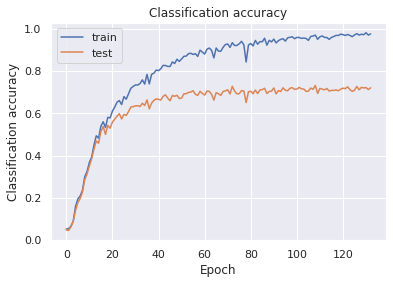

In [ ]:
train_acc_history = [0.05232919254658385, 0.05326086956521739, 0.06537267080745342, 0.08881987577639752, 0.15885093167701864, 0.19409937888198758, 0.20854037267080747, 0.23478260869565218, 0.29953416149068324, 0.3245341614906832, 0.3672360248447205, 0.39285714285714285, 0.4489130434782609, 0.4934782608695652, 0.4822981366459627, 0.5385093167701863, 0.5597826086956522, 0.5324534161490683, 0.5804347826086956, 0.5779503105590063, 0.6100931677018634, 0.6287267080745341, 0.6521739130434783, 0.6600931677018633, 0.6409937888198758, 0.6787267080745342, 0.6666149068322982, 0.6923913043478261, 0.7180124223602484, 0.7268633540372671, 0.7340062111801242, 0.7335403726708074, 0.7408385093167702, 0.7580745341614907, 0.737888198757764, 0.7838509316770186, 0.7388198757763975, 0.7843167701863354, 0.7894409937888198, 0.8043478260869565, 0.8015527950310559, 0.8105590062111802, 0.8265527950310559, 0.8259316770186336, 0.8217391304347826, 0.8212732919254658, 0.8427018633540373, 0.8354037267080745, 0.8555900621118012, 0.8453416149068324, 0.856832298136646, 0.8694099378881988, 0.8703416149068323, 0.8819875776397516, 0.8838509316770187, 0.8781055900621118, 0.881832298136646, 0.8687888198757764, 0.8986024844720497, 0.8892857142857142, 0.8799689440993789, 0.9027950310559006, 0.9085403726708075, 0.8978260869565218, 0.8619565217391304, 0.908695652173913, 0.893944099378882, 0.8934782608695652, 0.9118012422360249, 0.9251552795031056, 0.927639751552795, 0.9113354037267081, 0.9338509316770186, 0.9203416149068323, 0.9208074534161491, 0.9287267080745342, 0.9402173913043478, 0.9239130434782609, 0.842391304347826, 0.9226708074534161, 0.93027950310559, 0.9181677018633541, 0.9445652173913044, 0.9263975155279504, 0.9392857142857143, 0.9381987577639752, 0.9549689440993789, 0.9220496894409937, 0.9450310559006211, 0.9377329192546584, 0.950776397515528, 0.9327639751552795, 0.9434782608695652, 0.9495341614906833, 0.9527950310559006, 0.9414596273291925, 0.9568322981366459, 0.959472049689441, 0.9618012422360248, 0.9527950310559006, 0.9586956521739131, 0.9585403726708075, 0.9541925465838509, 0.9559006211180124, 0.9538819875776398, 0.9448757763975155, 0.9633540372670808, 0.9652173913043478, 0.96972049689441, 0.9496894409937888, 0.9618012422360248, 0.9656832298136646, 0.9588509316770186, 0.9583850931677018, 0.9496894409937888, 0.9586956521739131, 0.9630434782608696, 0.9683229813664597, 0.968167701863354, 0.9740683229813665, 0.9720496894409938, 0.9680124223602484, 0.9726708074534162, 0.968167701863354, 0.9624223602484472, 0.9704968944099379, 0.9765527950310559, 0.9698757763975155, 0.9739130434782609, 0.971583850931677, 0.9809006211180125, 0.96972049689441, 0.9754658385093168]
val_acc_history = [0.04780876494023904, 0.04563563926113727, 0.06302064469395147, 0.08837377761680551, 0.13980441868888083, 0.17710974284679465, 0.19630568634552698, 0.22672944585295182, 0.28504165157551614, 0.31293009779065556, 0.350597609561753, 0.38500543281419775, 0.42955450923578414, 0.46867077145961605, 0.4581673306772908, 0.5135820354943861, 0.537124230351322, 0.4998189061934082, 0.54291923216226, 0.5291561028612821, 0.5581311119159724, 0.5722564288301341, 0.5856573705179283, 0.5979717493661717, 0.5729808040565013, 0.594712060847519, 0.5896414342629482, 0.6077508149221297, 0.6294820717131474, 0.6312930097790656, 0.6349148859109018, 0.6356392611372691, 0.6320173850054328, 0.6472292647591452, 0.63672582397682, 0.6631655197392249, 0.6207895689967403, 0.6479536399855125, 0.6609923940601231, 0.6678739587106121, 0.6657008330315103, 0.6624411445128576, 0.6801883375588554, 0.6870699022093444, 0.6714958348424483, 0.659181455994205, 0.6841724013038754, 0.6801883375588554, 0.6848967765302426, 0.6696848967765302, 0.671858022455632, 0.6917783411807317, 0.6925027164070989, 0.6986599058312206, 0.7001086562839551, 0.7066280333212605, 0.6896052155016299, 0.6841724013038754, 0.7037305324157914, 0.6935892792466498, 0.6859833393697935, 0.7048170952553423, 0.7037305324157914, 0.6896052155016299, 0.662078956899674, 0.6975733429916697, 0.6921405287939153, 0.684534588917059, 0.7030061571894242, 0.7059036580948932, 0.710974284679464, 0.691416153567548, 0.7276349148859109, 0.7044549076421587, 0.6917783411807317, 0.6925027164070989, 0.7069902209344441, 0.7051792828685259, 0.6504889532777979, 0.7015574067366896, 0.704092720028975, 0.6928649040202826, 0.7095255342267295, 0.6932270916334662, 0.7102499094530967, 0.7120608475190149, 0.7182180369431366, 0.6935892792466498, 0.7030061571894242, 0.7048170952553423, 0.7196667873958711, 0.6917783411807317, 0.7069902209344441, 0.7030061571894242, 0.7203911626222383, 0.7088011590003622, 0.7066280333212605, 0.7182180369431366, 0.7211155378486056, 0.7131474103585658, 0.7145961608113003, 0.7222021006881565, 0.7153205360376675, 0.7145961608113003, 0.7033683448026078, 0.7048170952553423, 0.7193045997826875, 0.7127852227453821, 0.7316189786309308, 0.6935892792466498, 0.7178558493299529, 0.713871785584933, 0.710974284679464, 0.7171314741035857, 0.7051792828685259, 0.708076783773995, 0.7084389713871786, 0.7098877218399131, 0.7066280333212605, 0.713871785584933, 0.7185802245563202, 0.7164070988772184, 0.7250996015936255, 0.7120608475190149, 0.7037305324157914, 0.7088011590003622, 0.7269105396595437, 0.710974284679464, 0.7225642883013401, 0.7196667873958711, 0.7214777254617892, 0.7120608475190149, 0.7203911626222383]
plt.plot(train_acc_history, label='train')
plt.plot(val_acc_history, label='test')
title = 'Classification accuracy'
plt.title(title)
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/plot_confusion_matrix.py:59: RuntimeWarning: invalid value encountered in true_divide
  normed_conf_mat = conf_mat.astype('float') / total_samples


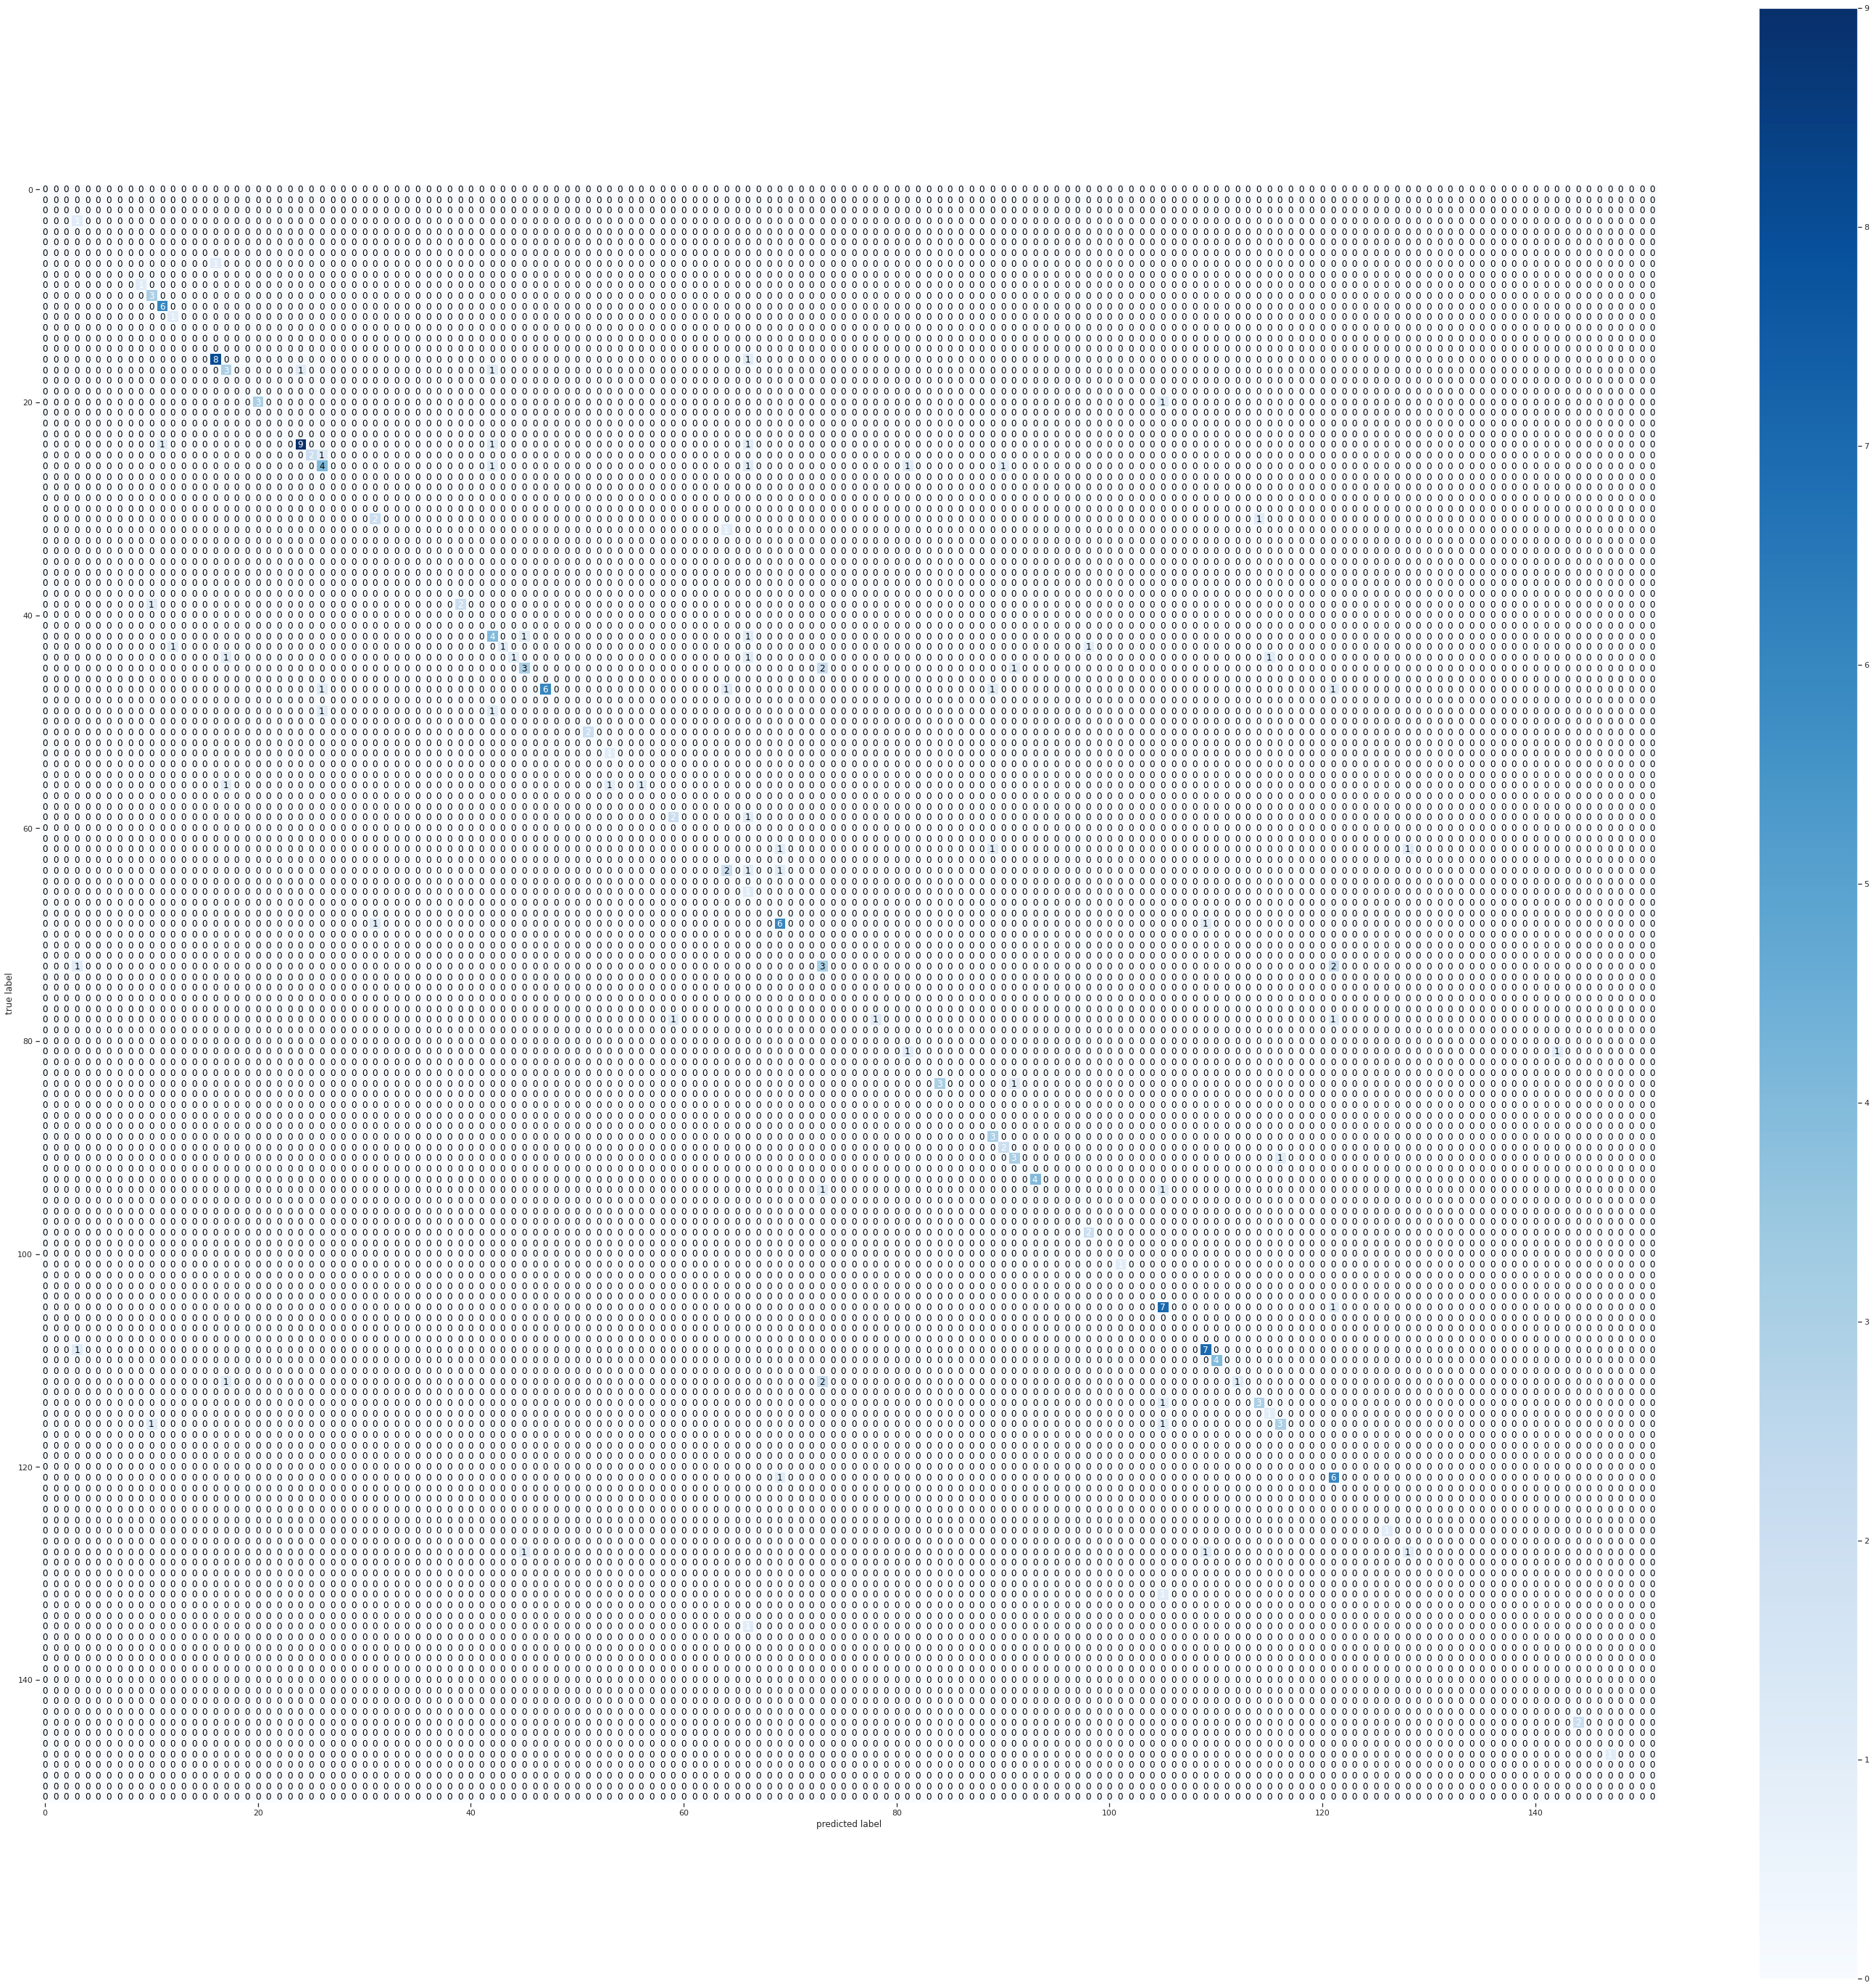

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
d = []
indexes = random.sample(range(0, len(test_df)), 200)
for i in indexes:
    d.append(test_df[i])
x = torch.stack([d[i][0] for i in range(len(d))])
y = torch.stack([d[i][1] for i in range(len(d))])

model.eval()  
with torch.no_grad():
    scores = model(x)
scores_class = scores.argmax(axis=1)
y_classes = y.argmax(axis=1)

yy = y_classes.detach().cpu()
yyy = scores_class.detach().cpu()

aa = [test_df.bird_decoder[int(x)] for x in yy]
bb = [test_df.bird_decoder[int(x)] for x in yyy]
Acf_matrix = confusion_matrix(aa, bb, labels=list(test_df.bird_decoder.values()))
del(d,x, y, scores, scores_class, y_classes, yy, yyy, aa, bb)

fig, ax = plot_confusion_matrix(conf_mat=Acf_matrix, colorbar=True, figsize=(50,50))
plt.show()